<a href="https://colab.research.google.com/github/RidhaAshSiddiqy/HomeCreditProject/blob/main/HomeCreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOME CREDIT SCORECARD MODEL

PT Home Credit Indonesia, or simply Home Credit, is a multinational finance company. The company provides in-store financing services (direct non-cash financing on-site) to customers looking to purchase items such as household appliances, electronics, cell phones, and furniture. In addition, the company develops technology-based financing services. Home Credit, which was founded in Jakarta in 2013, now has over 19,000 distribution points spread across 144 cities in Indonesia. The company had served 3.4 million customers both online and offline as of March 2019.

Home Credit is currently predicting credit scores using a variety of statistical methods and machine learning. We now ask that you maximize the value of our data. By doing so, we can ensure that a customer who is able to pay off is not rejected when applying for a loan and that the loan is given with a principal, maturity, and repayment calendar that will motivate the customer to succeed. The evaluation will be based on how well you understand the analysis you are working on. Please keep in mind that you must use at least two machine learning models, one of which is logistic regression.

## GOAL & OBJECTIVE

The goal of this project is to gain insight into the case of payment in a loan and to predict whether the client is experiencing payment difficulties (late payment) or if there are other cases that have occurred to the client. In this project, the objective to be achieved is to determine which features can affect the cases related to payment in a loan and then create a training model with not too high accuracy but not too low. After predicting the case of payment in the loan, a business recommendation can be determined in accordance with the selected feature factor in order to solve an existing problem.





## METRICS

This project's metrics are the following:
*   ROC-AUC
*   Accuracy
*   Recall
*   Precision
*   F1 Score







## DATA

There are 8 data used in the Home Credit Score project which are shown as follows:
*   [application_test.csv](https://drive.google.com/file/d/1r68IbgnWtxfN98HcoiXLUfFvKTib0H3l/view?usp=drive_link)
*   [application_train.csv](https://drive.google.com/file/d/1oqucfqn67RYJJixI-4o1XClVi4KxuEtC/view?usp=drive_link)
*   [bureau.csv](https://drive.google.com/file/d/1GTFaibNNH7lxBav2dMJVvHxmdw-vR1Qz/view?usp=drive_link)
*   [bureau_balance.csv](https://drive.google.com/file/d/1a0kLkA_s-WjWubCDlFwLyZKCdau_KG6b/view?usp=drive_link)
*   [credit_card_balance.csv](https://drive.google.com/file/d/19FoWag2KnuC8x-0de921tx_BbynbDPq2/view?usp=drive_link)
*   [installment_payments.csv](https://drive.google.com/file/d/1KTTJewUhSonNwT3jqjmUbTjdWPHJrtz-/view?usp=drive_link)
*   [POSH_CASH_balance.csv](https://drive.google.com/file/d/1_rA-EivIfAeuLna4jgRwxJE_EYmRvL1H/view?usp=drive_link)
*   [previous_application.csv](https://drive.google.com/file/d/1rUiDJWgqLHjRbqeQXvE3fQmCeUJ6j-2N/view?usp=drive_link)














In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LOAD DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Home Credit Dataset Projek/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Home Credit Dataset Projek/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
df_train.shape

(307511, 122)

In [ ]:
df_test.shape

(48744, 121)

In [ ]:
df_train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [ ]:
df_test.nunique()

SK_ID_CURR                    48744
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         3
AMT_REQ_CREDIT_BUREAU_WEEK        3
AMT_REQ_CREDIT_BUREAU_MON         7
AMT_REQ_CREDIT_BUREAU_QRT         8
AMT_REQ_CREDIT_BUREAU_YEAR       16
Length: 121, dtype: int64

In [ ]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
df_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

## JOIN DATA

The data to be merged has already been merged with other data. The datasets created as a result of the merger are listed below:
*   [credit_join.csv](https://drive.google.com/file/d/1yKVnGPIqLgDom0_QH0UiEn6wpaMF7NBo/view?usp=drive_link)
*   [bureau_join.csv](https://drive.google.com/file/d/1pAx3dnMNvw_dtdQ9HK7TENlAbrhVGg5w/view?usp=drive_link)

Before app_train data is done joining data, application_train.csv data has 307511 samples. However, when application_train.CSV data has been joined, the number of samples is 7451. This is because when joining data on the above data, the RAM capacity is very limited on Google Colab, so the data is restricted in joining the data. The same is true of application_test.csv data.


In [ ]:
bureau_join = pd.read_csv('/content/drive/MyDrive/Home Credit Dataset Projek/bureau_join.csv')
bureau_join.columns

Index(['SK_ID_BUREAU', 'SK_ID_CURR_x', 'CREDIT_ACTIVE_x', 'CREDIT_CURRENCY_x',
       'DAYS_CREDIT_x', 'CREDIT_DAY_OVERDUE_x', 'DAYS_CREDIT_ENDDATE_x',
       'DAYS_ENDDATE_FACT_x', 'AMT_CREDIT_MAX_OVERDUE_x',
       'CNT_CREDIT_PROLONG_x', 'AMT_CREDIT_SUM_x', 'AMT_CREDIT_SUM_DEBT_x',
       'AMT_CREDIT_SUM_LIMIT_x', 'AMT_CREDIT_SUM_OVERDUE_x', 'CREDIT_TYPE_x',
       'DAYS_CREDIT_UPDATE_x', 'AMT_ANNUITY_x', 'SK_ID_CURR_y',
       'CREDIT_ACTIVE_y', 'CREDIT_CURRENCY_y', 'DAYS_CREDIT_y',
       'CREDIT_DAY_OVERDUE_y', 'DAYS_CREDIT_ENDDATE_y', 'DAYS_ENDDATE_FACT_y',
       'AMT_CREDIT_MAX_OVERDUE_y', 'CNT_CREDIT_PROLONG_y', 'AMT_CREDIT_SUM_y',
       'AMT_CREDIT_SUM_DEBT_y', 'AMT_CREDIT_SUM_LIMIT_y',
       'AMT_CREDIT_SUM_OVERDUE_y', 'CREDIT_TYPE_y', 'DAYS_CREDIT_UPDATE_y',
       'AMT_ANNUITY_y', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [ ]:
bureau_join.rename(columns={'SK_ID_CURR_x':'SK_ID_CURR','CREDIT_ACTIVE_x':'CREDIT_ACTIVE','CREDIT_CURRENCY_x':'CREDIT_CURRENCY',
                            'DAYS_CREDIT_x':'DAYS_CREDIT','CREDIT_DAY_OVERDUE_x':'CREDIT_DAY_OVERDUE','DAYS_CREDIT_ENDDATE_x':'DAYS_CREDIT_ENDDATE',
                            'DAYS_ENDDATE_FACT_x':'DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE_x':'AMT_CREDIT_MAX_OVERDUE','CNT_CREDIT_PROLONG_x':'CNT_CREDIT_PROLONG',
                            'AMT_CREDIT_SUM_x':'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT_x':'AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT_x':'AMT_CREDIT_SUM_LIMIT',
                            'AMT_CREDIT_SUM_OVERDUE_x':'AMT_CREDIT_SUM_OVERDUE','CREDIT_TYPE_x':'CREDIT_TYPE',
                            'DAYS_CREDIT_UPDATE_x':'DAYS_CREDIT_UPDATE','AMT_ANNUITY_x':'AMT_ANNUITY'},inplace=True)

In [ ]:
bureau_join.drop(['SK_ID_CURR_y',
       'CREDIT_ACTIVE_y', 'CREDIT_CURRENCY_y', 'DAYS_CREDIT_y',
       'CREDIT_DAY_OVERDUE_y', 'DAYS_CREDIT_ENDDATE_y', 'DAYS_ENDDATE_FACT_y',
       'AMT_CREDIT_MAX_OVERDUE_y', 'CNT_CREDIT_PROLONG_y', 'AMT_CREDIT_SUM_y',
       'AMT_CREDIT_SUM_DEBT_y', 'AMT_CREDIT_SUM_LIMIT_y',
       'AMT_CREDIT_SUM_OVERDUE_y', 'CREDIT_TYPE_y', 'DAYS_CREDIT_UPDATE_y',
       'AMT_ANNUITY_y'],axis=1,inplace=True)

In [ ]:
bureau_join

,SK_ID_BUREAU,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,5001710,162368,Closed,currency 1,-2497,0,-1402.0,-1439.0,NaN,0,450000.00,0.0,0.0,0.0,Consumer credit,-329,0.0,-82,X
1,5001711,162368,Active,currency 1,-115,0,30865.0,NaN,NaN,0,225000.00,213885.0,NaN,0.0,Credit card,-30,0.0,-3,0
2,5001712,162368,Closed,currency 1,-568,0,-264.0,-264.0,0.0,0,138388.50,0.0,0.0,0.0,Consumer credit,-261,NaN,-18,0
3,5001713,150635,Closed,currency 1,-652,0,-75.0,-316.0,NaN,0,104922.18,0.0,NaN,0.0,Consumer credit,-19,NaN,-21,X
4,5001714,150635,Closed,currency 1,-450,0,-55.0,-234.0,NaN,0,52596.00,0.0,NaN,0.0,Consumer credit,-19,NaN,-14,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94018,6834663,162862,Active,currency 1,-2669,0,8822.0,NaN,NaN,0,79650.00,NaN,NaN,0.0,Credit card,-14,3316.5,-87,X
94019,6834706,147133,Closed,currency 1,-2905,0,-1809.0,-2367.0,NaN,0,540000.00,0.0,0.0,0.0,Consumer credit,-559,0.0,-95,0
94020,6834716,374200,Closed,currency 1,-957,0,-716.0,-686.0,NaN,0,48775.50,NaN,NaN,0.0,Consumer credit,-680,0.0,-31,0
94021,6834719,374200,Closed,currency 1,-2261,0,-1896.0,-1927.0,0.0,0,63577.80,0.0,0.0,0.0,Consumer credit,-1927,NaN,-74,0


In [ ]:
bureau_join=bureau_join.groupby('SK_ID_CURR').last().reset_index()

In [ ]:
credit_join = pd.read_csv('/content/drive/MyDrive/Home Credit Dataset Projek/credit_join.csv')

In [ ]:
data_join=pd.merge(bureau_join,credit_join,on='SK_ID_CURR',how='inner')

In [ ]:
data_join=data_join.groupby('SK_ID_CURR').last().reset_index()

In [ ]:
app_train=pd.merge(data_join,df_train,on='SK_ID_CURR',how='inner')

In [ ]:
app_test=pd.merge(data_join,df_test,on='SK_ID_CURR',how='inner')

In [ ]:
app_train=app_train.groupby('SK_ID_CURR').last().reset_index()
app_train.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100054,5727773,Active,currency 1,-1138,0,-772.0,-1114.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,100105,5707344,Closed,currency 1,-1724,0,-1632.0,-1660.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0
2,100131,6372722,Active,currency 1,-875,0,961.0,NaN,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
3,100204,6363484,Closed,currency 1,-146,0,-93.0,-19.0,NaN,0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
4,100221,5625644,Closed,currency 1,-2703,0,-1972.0,-1972.0,NaN,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:
app_test=app_test.groupby('SK_ID_CURR').last().reset_index()
app_test.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100057,5004967,Closed,currency 1,-1542,0,-863.0,-863.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100067,5828832,Closed,currency 1,-1358,0,9600.0,-906.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,100090,6369797,Active,currency 1,-208,0,157.0,NaN,NaN,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
3,100109,5011296,Closed,currency 1,-2153,0,-1818.0,-1818.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100256,6030627,Active,currency 1,-299,0,68.0,-1305.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [ ]:
app_train.shape

(7451, 176)

In [ ]:
app_test.shape

(4469, 175)

## HANDLING MISSING VALUE

Data cleaning is a must when doing data analysis. It is done so that data can be modeled with a high degree of accuracy. With regard to this project, the data cleaning process involves five steps:
1. Drop columns that have no value (NAN or null).
2. Drop columns that are not correlated to the target (Check on the Feature Selection).
3. Drop columns that have a unique value difference between the data train and the data test (Check on the unique value).
4. Drop the index that contains the outlier value (Check on the Handling Outliers).
5. Drop columns that have a single value.

In [ ]:
app_train.dropna(axis = 1, inplace = True)
app_train.isnull().sum()

SK_ID_CURR                    0
SK_ID_BUREAU                  0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 102, dtype: int64

In [ ]:
app_test.dropna(axis = 1, inplace = True)
app_test.isnull().sum()

SK_ID_CURR                    0
SK_ID_BUREAU                  0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 104, dtype: int64

## HANDLING OUTLIERS

In [ ]:
app_train.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,7451.000000,7.451000e+03,7451.000000,7451.000000,7451.000000,7.451000e+03,7451.000000,7451.000000,7451.000000,7.451000e+03,...,7451.000000,7451.000000,7451.000000,7451.0,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000
mean,276537.412159,6.001131e+06,-1033.703261,0.701382,0.011408,3.983825e+05,5.129348,-518.796269,-33.467857,2.050101e+06,...,0.003892,0.000134,0.000134,0.0,0.007516,0.007113,0.028587,0.289760,0.337539,2.511341
std,103808.164610,5.511105e+05,799.925799,40.099327,0.125869,1.005745e+06,297.227600,647.878583,26.280100,5.261633e+05,...,0.062269,0.011585,0.011585,0.0,0.090916,0.117367,0.205597,0.838616,0.642363,1.953891
min,100054.000000,5.008805e+06,-2922.000000,0.000000,0.000000,0.000000e+00,0.000000,-2846.000000,-96.000000,1.000112e+06,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,184725.500000,5.614379e+06,-1557.000000,0.000000,0.000000,5.992425e+04,0.000000,-825.000000,-51.000000,1.620548e+06,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,276929.000000,6.021776e+06,-828.000000,0.000000,0.000000,1.350000e+05,0.000000,-235.000000,-27.000000,2.110155e+06,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367074.000000,6.560147e+06,-359.000000,0.000000,0.000000,3.573791e+05,0.000000,-22.000000,-11.000000,2.509780e+06,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,456247.000000,6.833278e+06,-1.000000,2592.000000,3.000000,3.150000e+07,24894.000000,0.000000,0.000000,2.843296e+06,...,1.000000,1.000000,1.000000,0.0,3.000000,5.000000,6.000000,13.000000,6.000000,12.000000


In [ ]:
app_test.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,4469.000000,4.469000e+03,4469.000000,4469.000000,4469.000000,4.469000e+03,4469.000000,4469.000000,4469.000000,4.469000e+03,...,4469.000000,4469.0,4469.0,4469.0,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,272571.382636,5.996984e+06,-1250.852092,1.303647,0.002238,3.476943e+05,14.111271,-675.654733,-40.632580,2.053176e+06,...,0.000895,0.0,0.0,0.0,0.002685,0.001566,0.001343,0.009622,0.454240,2.548445
std,102150.188984,5.718327e+05,789.525669,49.815243,0.051776,8.520917e+05,472.041494,698.712175,25.942005,5.371550e+05,...,0.029907,0.0,0.0,0.0,0.051755,0.039551,0.036621,0.106404,0.652091,1.988708
min,100057.000000,5.001712e+06,-2920.000000,0.000000,0.000000,0.000000e+00,0.000000,-2813.000000,-95.000000,1.001800e+06,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183512.000000,5.567213e+06,-1780.000000,0.000000,0.000000,5.103000e+04,0.000000,-1074.000000,-58.000000,1.596481e+06,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271762.000000,6.029234e+06,-1111.000000,0.000000,0.000000,1.170000e+05,0.000000,-478.000000,-36.000000,2.138710e+06,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,359377.000000,6.548618e+06,-609.000000,0.000000,0.000000,2.960526e+05,0.000000,-31.000000,-20.000000,2.527275e+06,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,456116.000000,6.834663e+06,-4.000000,2534.000000,2.000000,1.912500e+07,24160.500000,-1.000000,0.000000,2.843456e+06,...,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,2.000000,4.000000,12.000000


In [ ]:
NonNumerical = app_train.select_dtypes(include=['object']).columns.tolist()
NonNumerical

['CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE',
 'STATUS',
 'NAME_CONTRACT_TYPE_x',
 'WEEKDAY_APPR_PROCESS_START_x',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_TYPE_y',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'ORGANIZATION_TYPE']

In [ ]:
Numerical = [x for x in app_train.columns if x not in NonNumerical]

In [ ]:
df_num=app_train[Numerical]
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_extreme=Q1-(IQR*1.5)
upper_extreme=Q3+(IQR*1.5)

In [ ]:
((df_num < lower_extreme) | (df_num > upper_extreme)).any()

SK_ID_CURR                    False
SK_ID_BUREAU                  False
DAYS_CREDIT                   False
CREDIT_DAY_OVERDUE             True
CNT_CREDIT_PROLONG             True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 73, dtype: bool

In [ ]:
x = ((df_num < lower_extreme) | (df_num > upper_extreme))
x['res']=x.any(axis=1)
x[x['res']==True].shape

(6833, 74)

In [ ]:
app_Train = app_train[app_train.index.isin(x[x['res']==False].index.to_list())]
app_Train

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
9,100362,6778677,Closed,currency 1,-2021,0,0,225000.0,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
38,101499,5702158,Closed,currency 1,-1030,0,0,17055.0,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
43,101671,6372669,Closed,currency 1,-340,0,0,49099.5,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
49,102246,6259030,Closed,currency 1,-231,0,0,21289.5,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
76,103497,6560314,Closed,currency 1,-1618,0,0,61816.5,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,453609,5193912,Active,currency 1,-608,0,0,168705.0,0.0,Credit card,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
7411,454118,6540255,Active,currency 1,-25,0,0,450000.0,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7418,454376,5253053,Closed,currency 1,-1576,0,0,48600.0,0.0,Consumer credit,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
7435,455192,5829624,Closed,currency 1,-1345,0,0,0.0,0.0,Credit card,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## EXPLORATORY DATA ANALYSIS

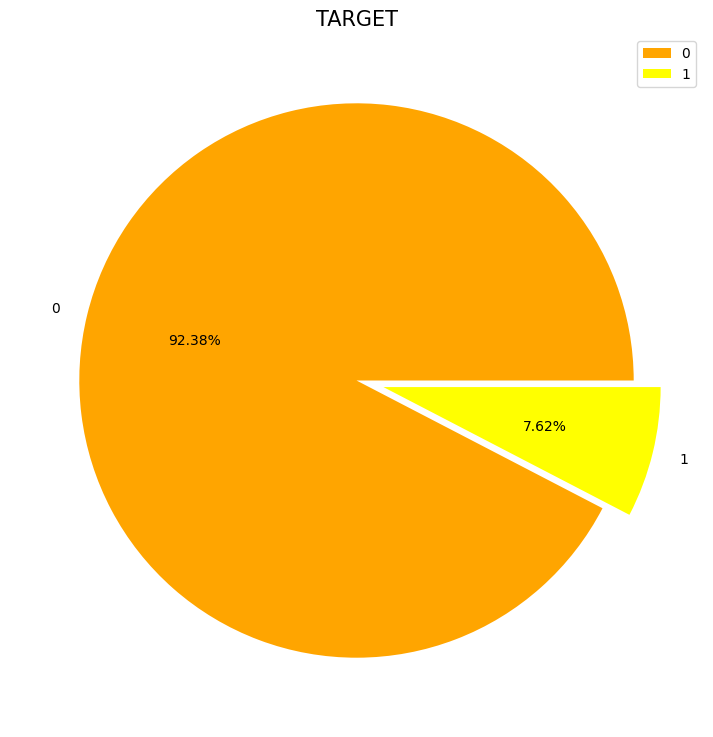

In [ ]:
# Pie Data Visualization for Data Train
labels = [0, 1]
size = app_train['TARGET'].value_counts()
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('TARGET', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
col_show = np.array(NonNumerical)
len(col_show.tolist())

29

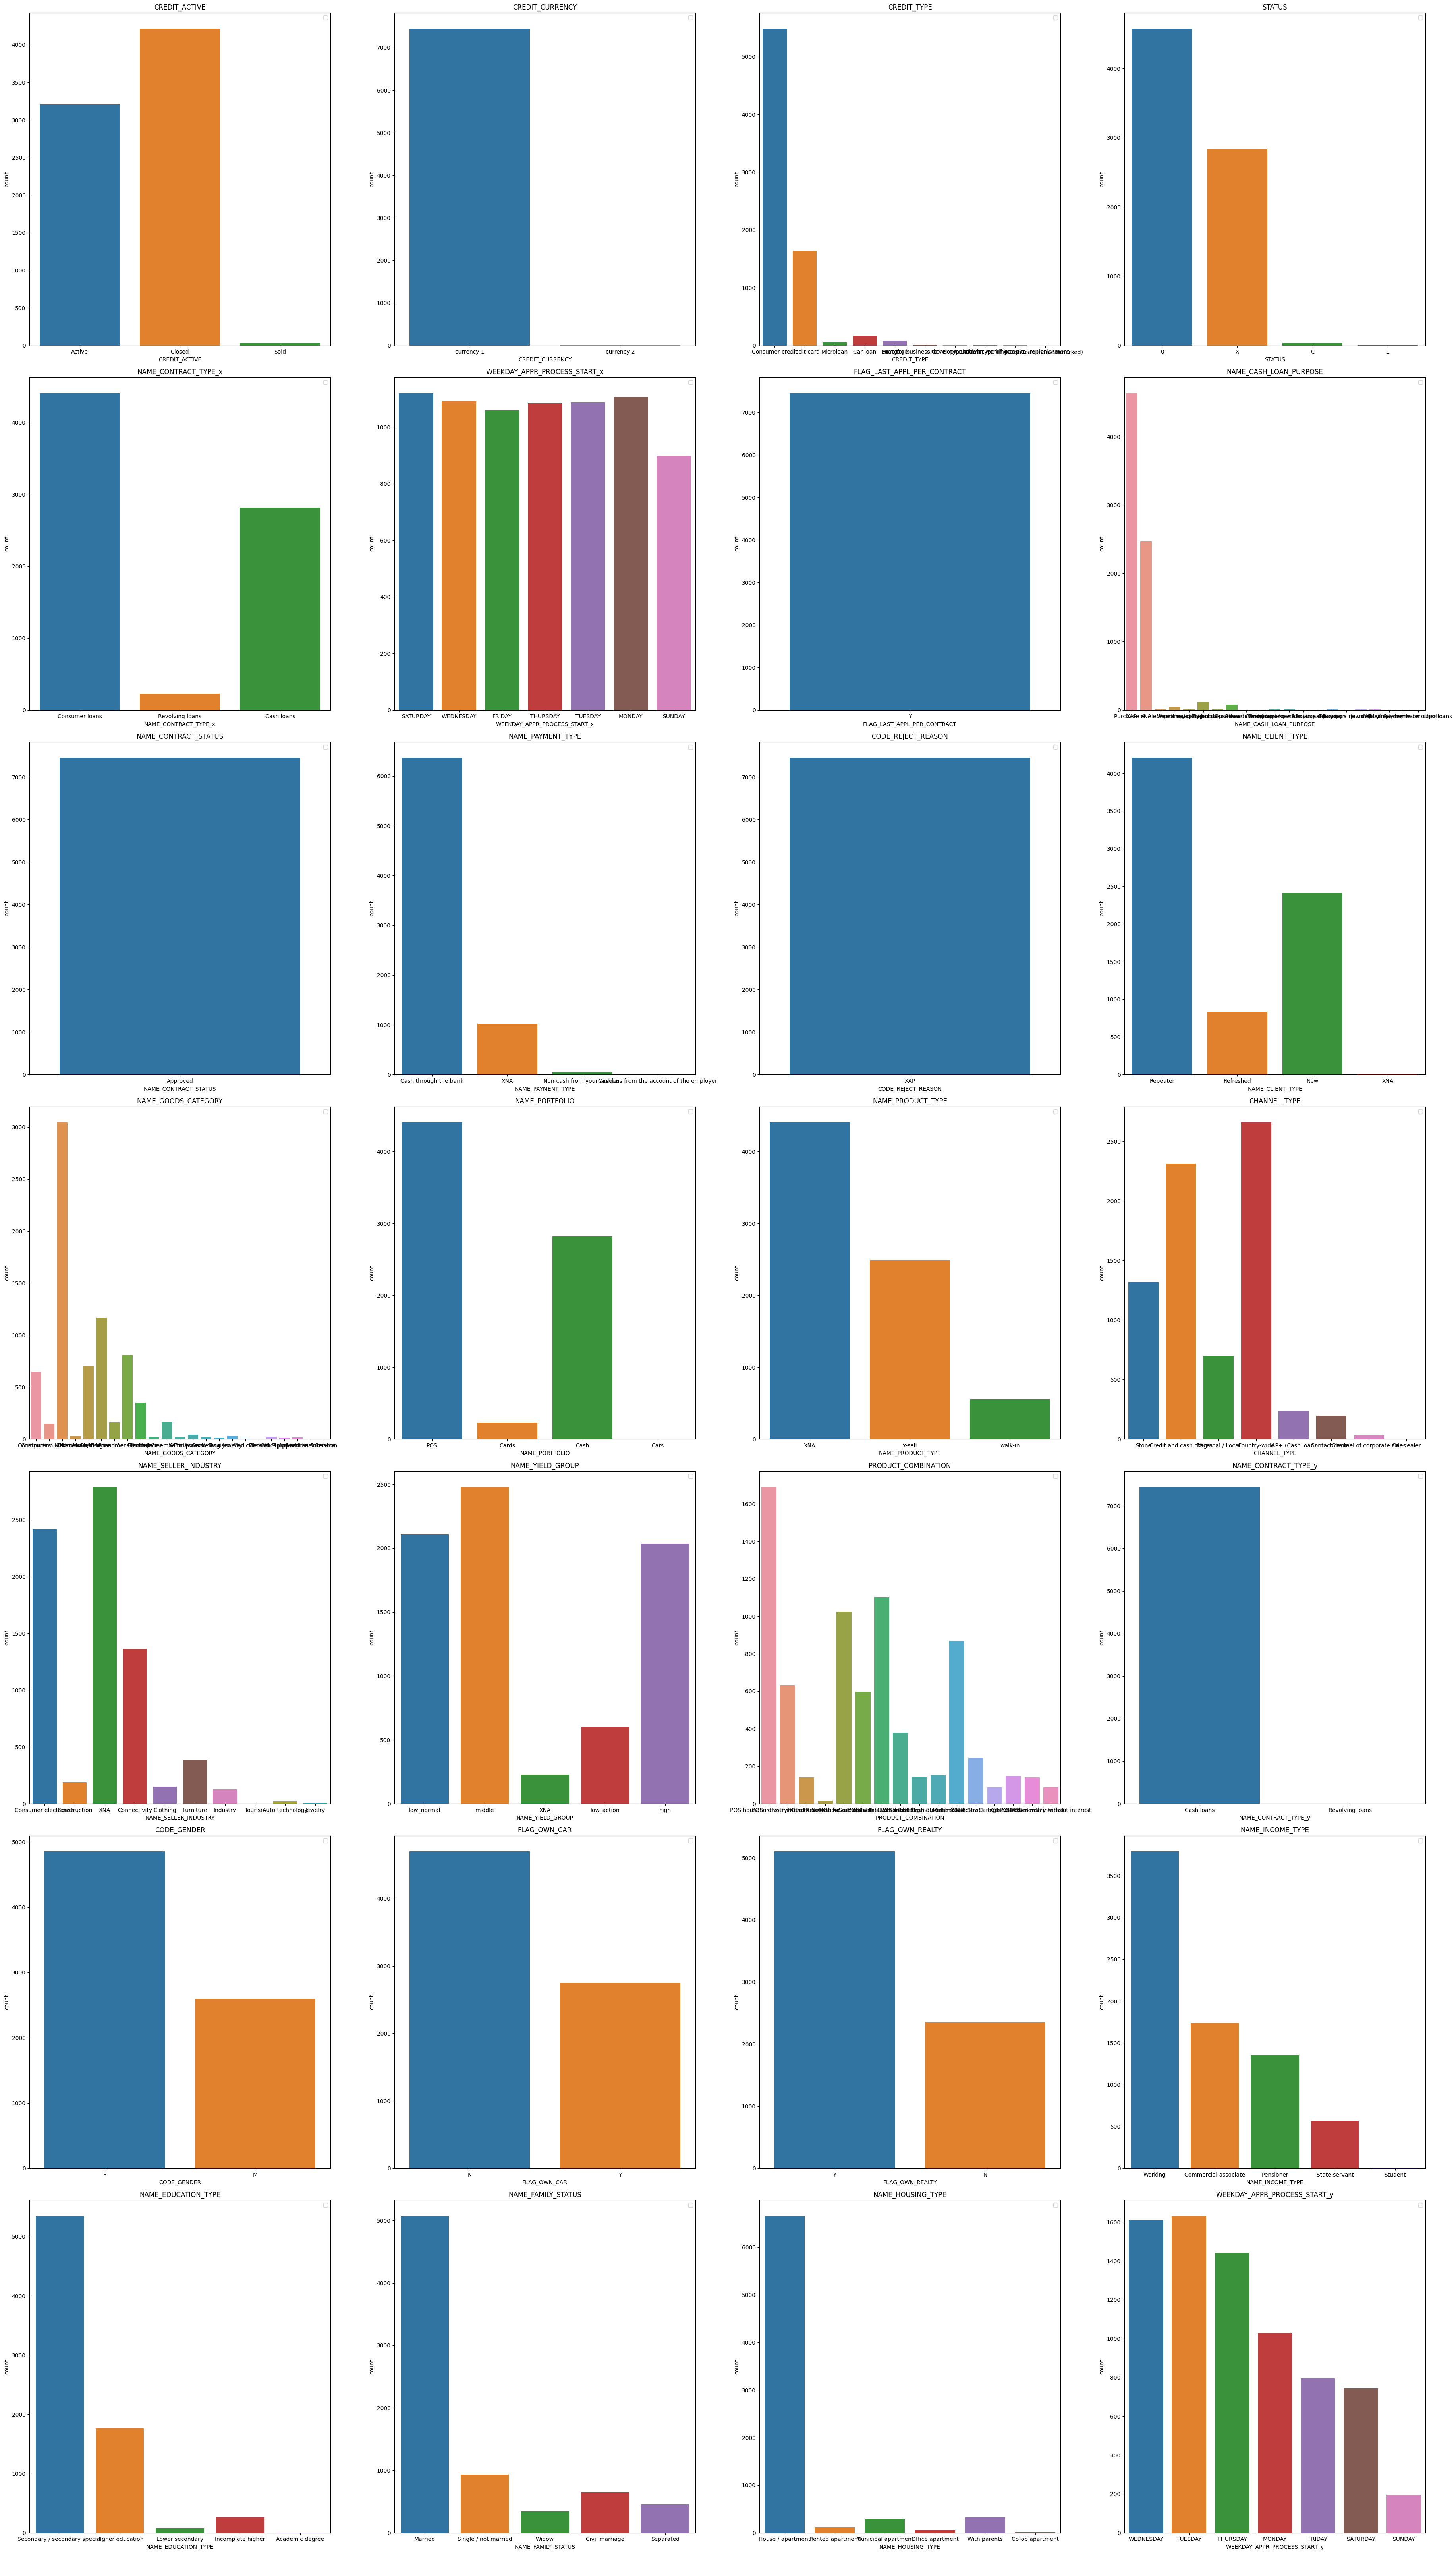

In [ ]:
col=col_show.tolist()

n_rows=7
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*9.2,n_rows*9.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(app_train, x=col[i], ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

Based on the data visualization above it can be seen that there are three columns that contain single values i.e. FLAG_LAST_APPL_PER_CONTRACT, CODE_REJECT_REASON, NAME_CONTRACT_STATUS.

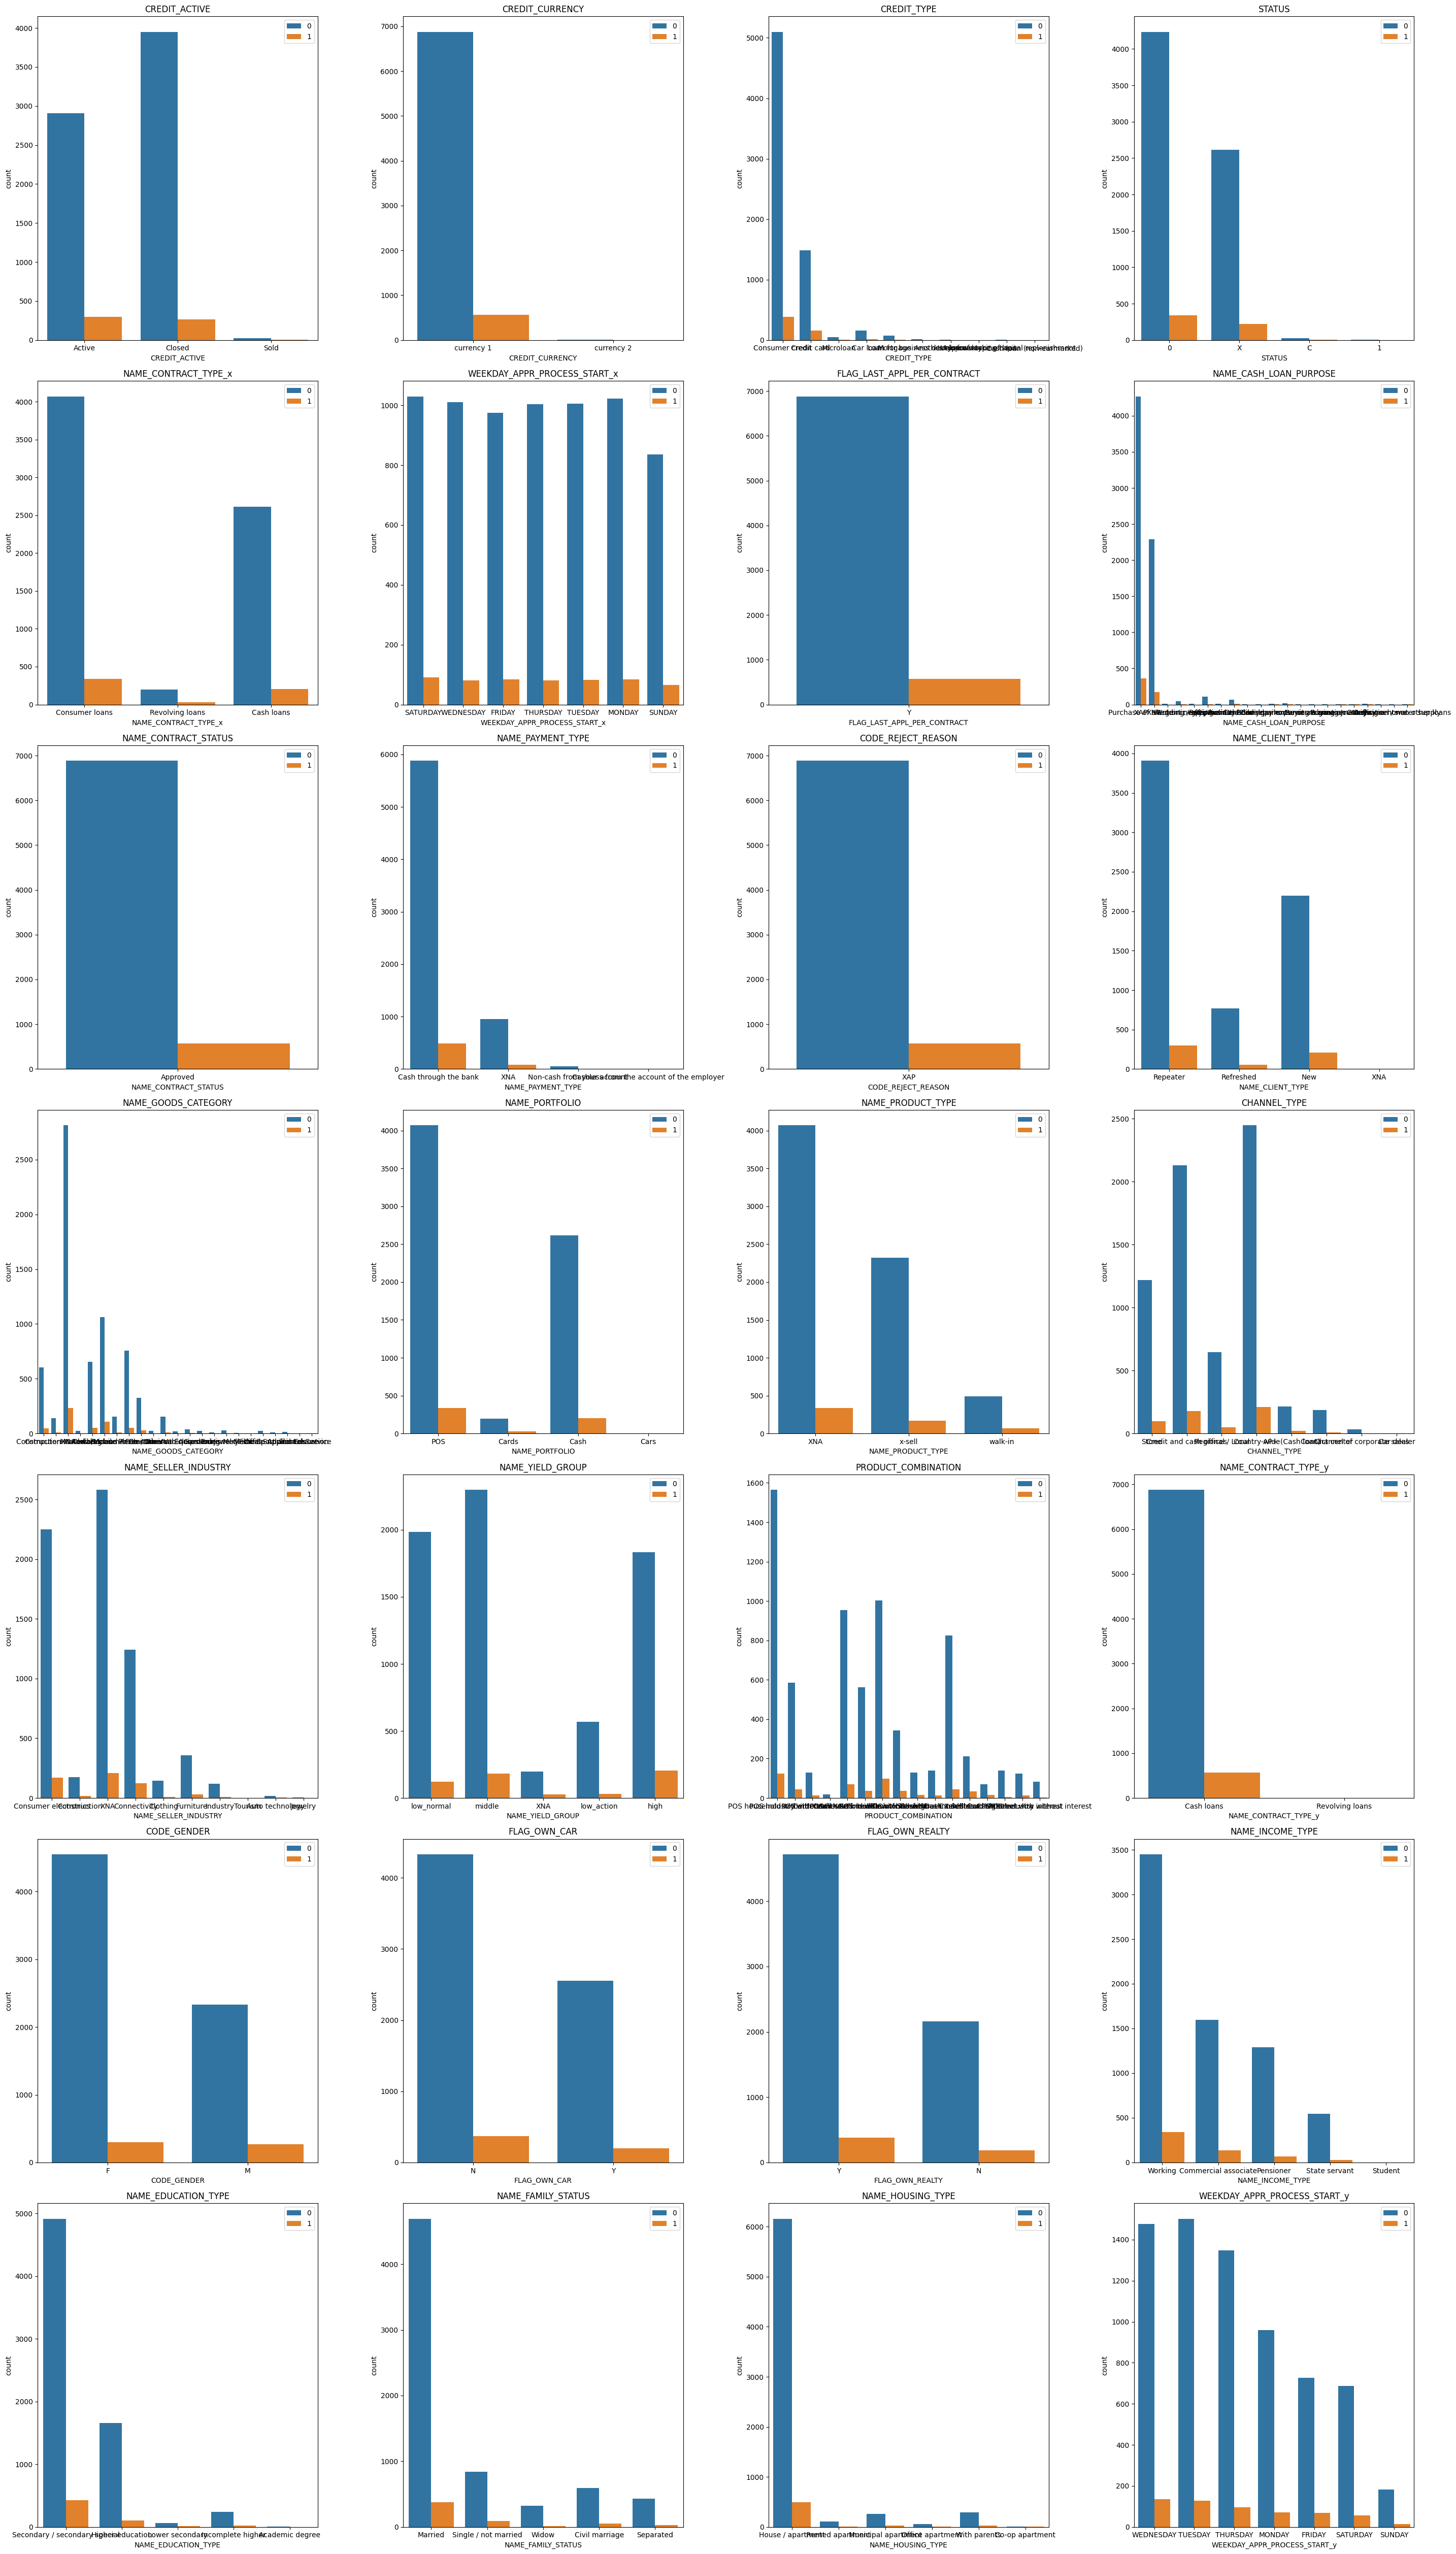

In [ ]:
cols=col_show.tolist()

n_rows=7
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*7.2,n_rows*7.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(data = app_train, x=cols[i], hue='TARGET', ax=ax)
        ax.set_title(cols[i])
        ax.legend(loc='upper right')

plt.tight_layout()

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'SK_ID_BUREAU'}>,
        <Axes: title={'center': 'DAYS_CREDIT'}>,
        <Axes: title={'center': 'CREDIT_DAY_OVERDUE'}>,
        <Axes: title={'center': 'CNT_CREDIT_PROLONG'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM_OVERDUE'}>,
        <Axes: title={'center': 'DAYS_CREDIT_UPDATE'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>],
       [<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'AMT_ANNUITY_y'}>,
        <Axes: title={'center': 'AMT_APPLICATION'}>,
        <Axes: title={'center': 'AMT_CREDIT_x'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START_x'}>,
        <Axes: title={'center': 'NFLAG_LAST_APPL_IN_DAY'}>,
        <Axes: title={'center': 'DAYS_DECISION'}>,
        <Axes: title={'center': 'SELLERPLACE_AREA'}>,
        <Axes: title={'center': 'CNT_PAYMENT'}>],
       [<Axes: title={'center': 'TARGET'

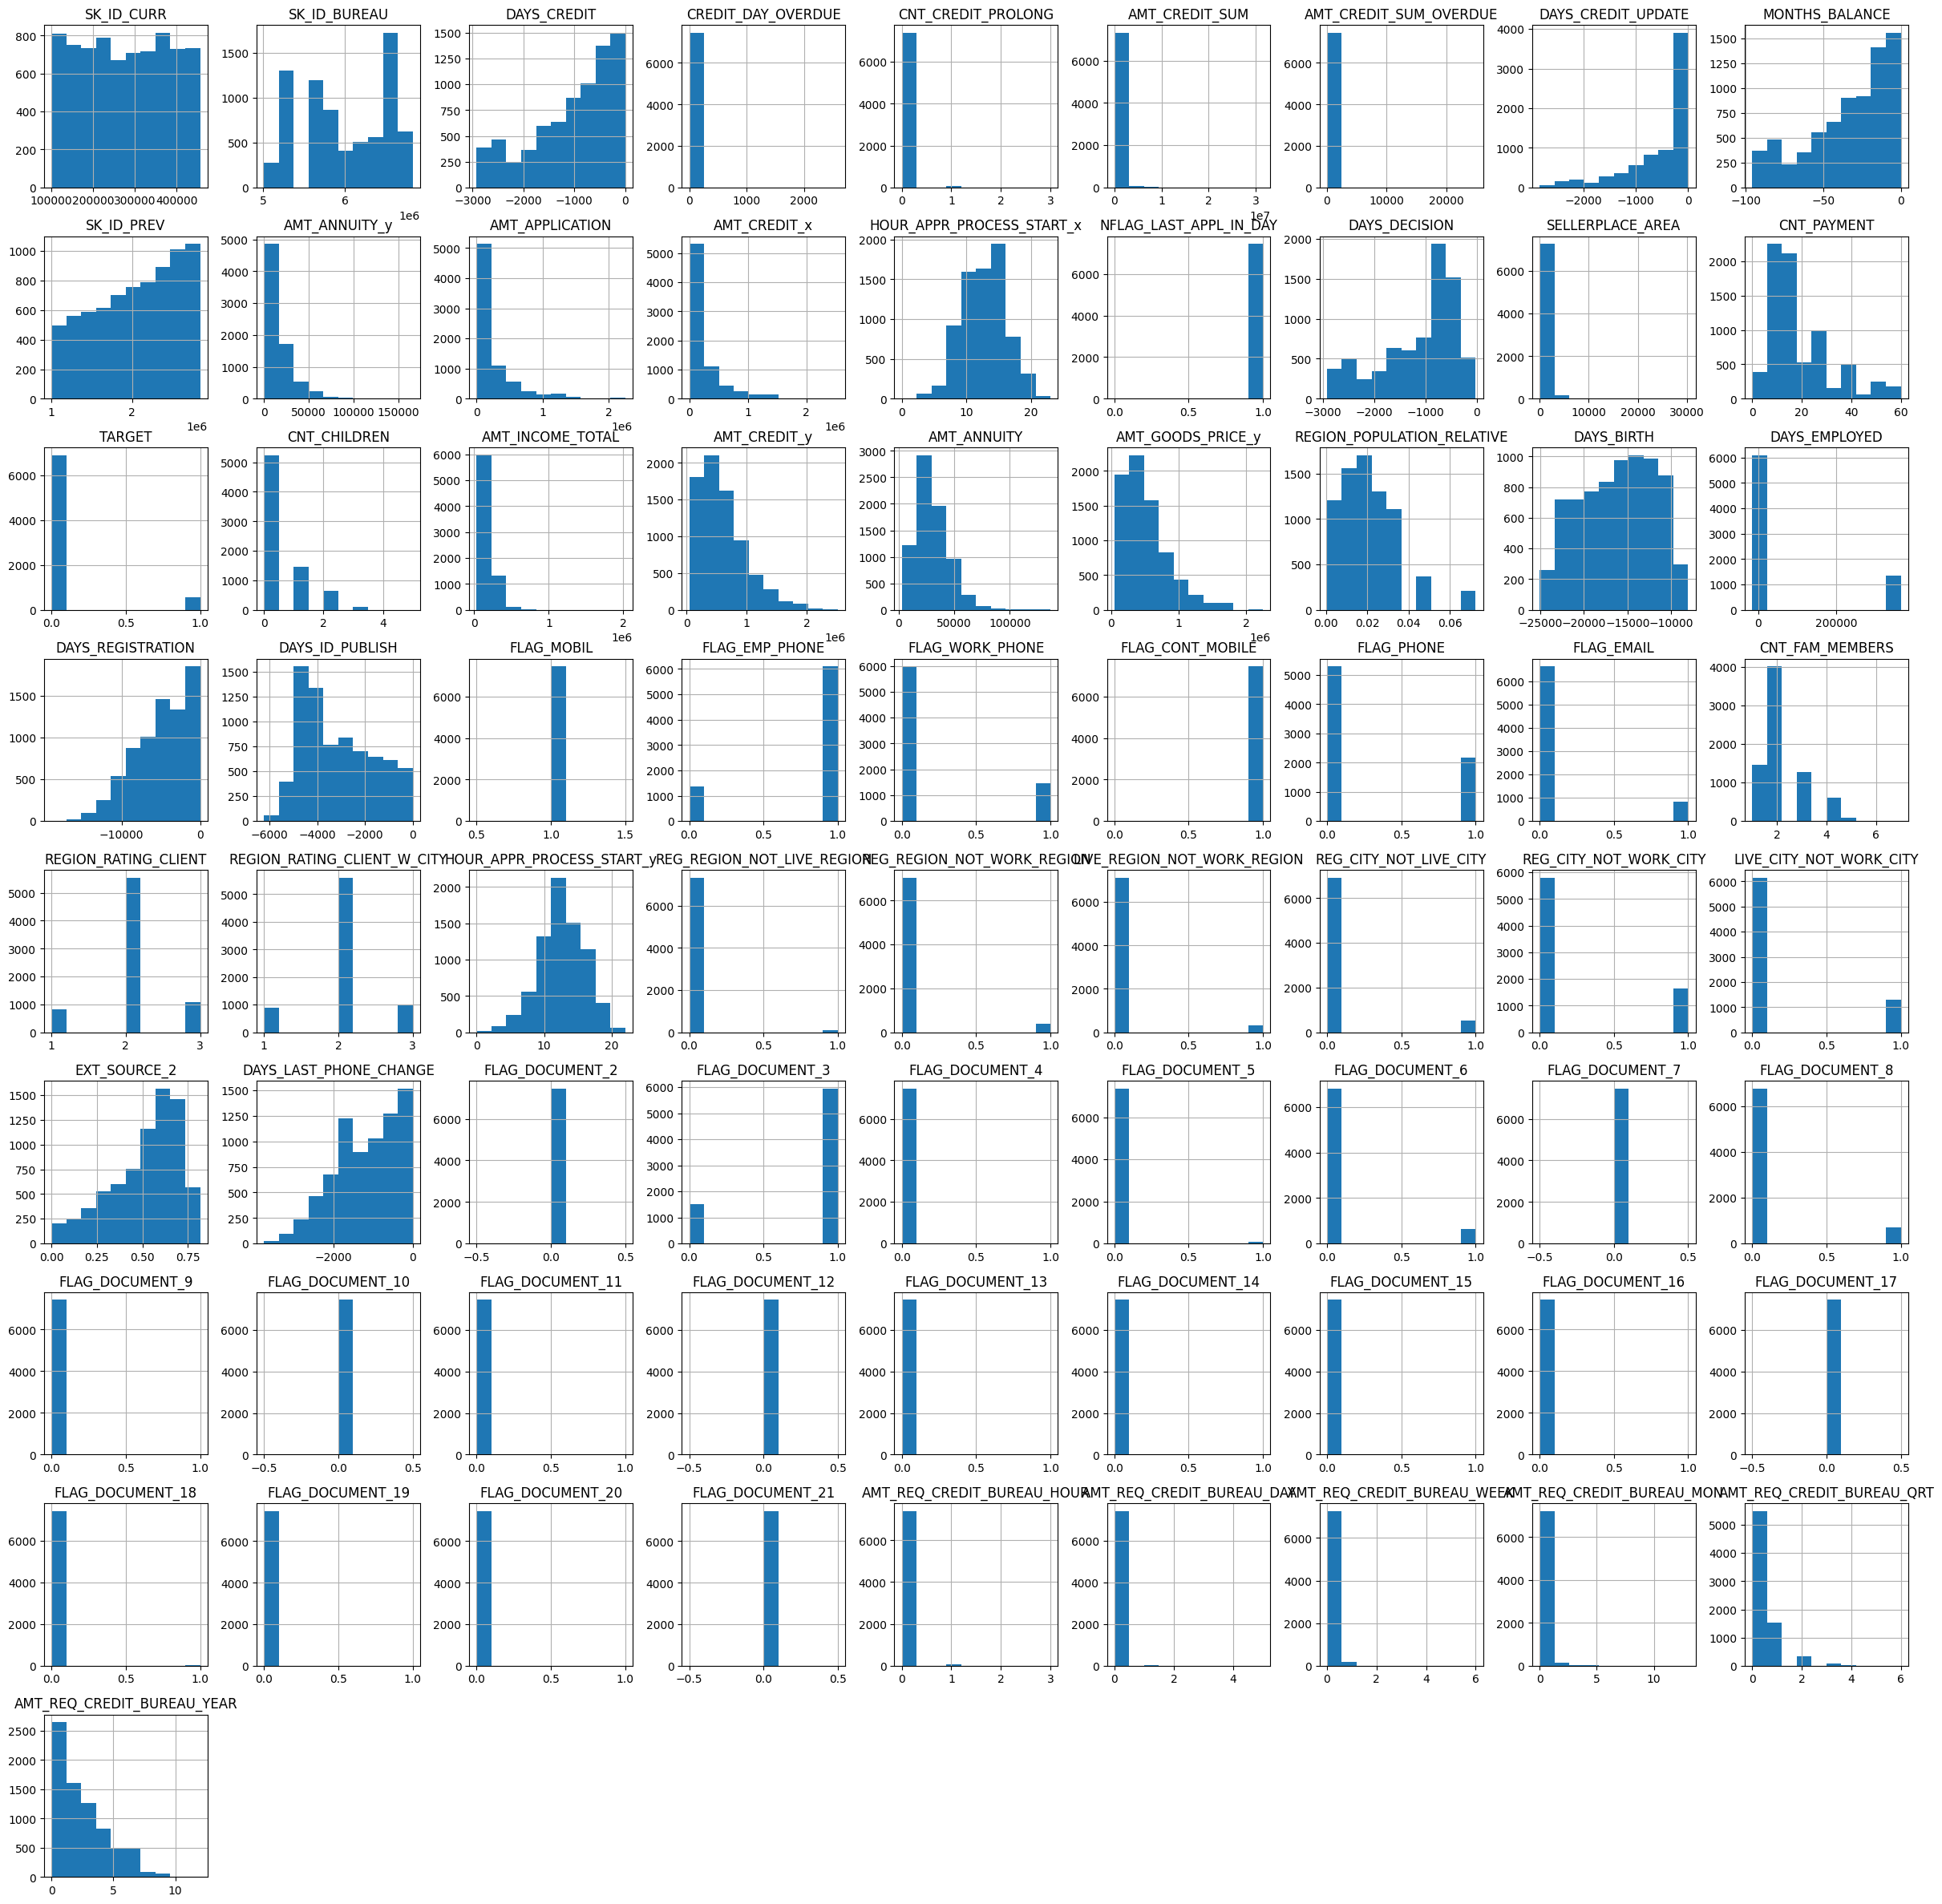

In [ ]:
app_train[Numerical].hist(figsize = (30, 30))

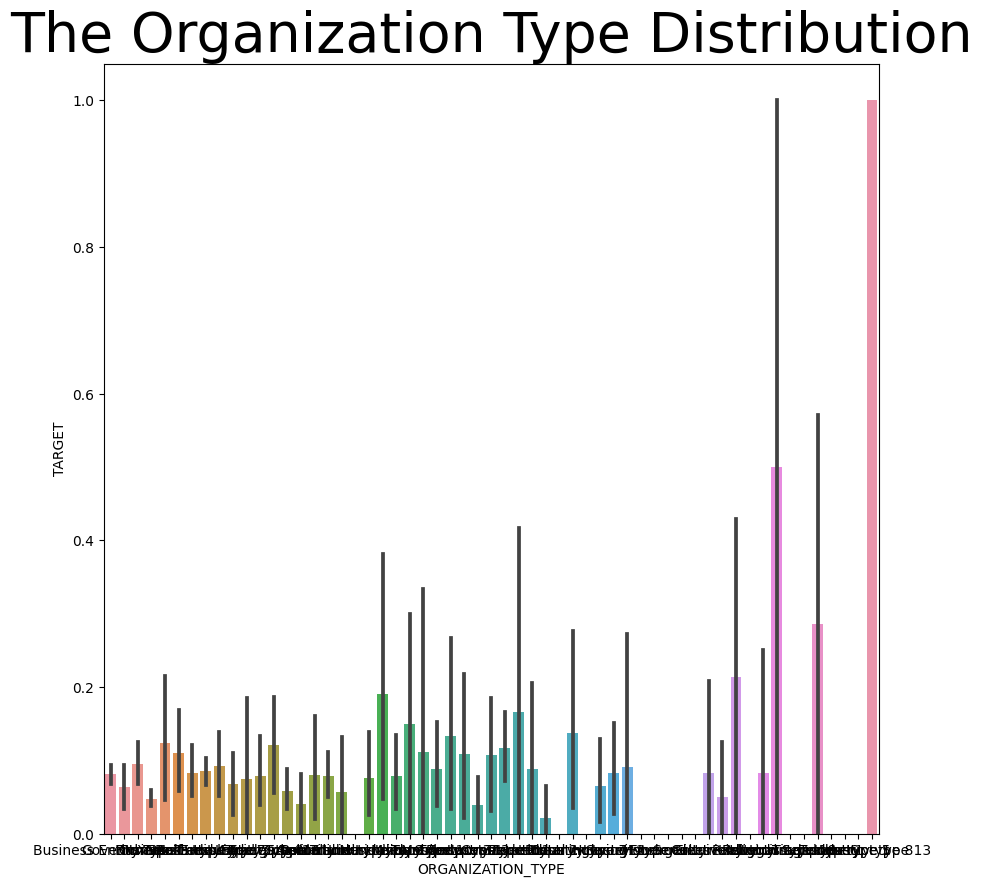

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET', data=app_train)
plt.title('The Organization Type Distribution', fontsize = 40)
plt.show()

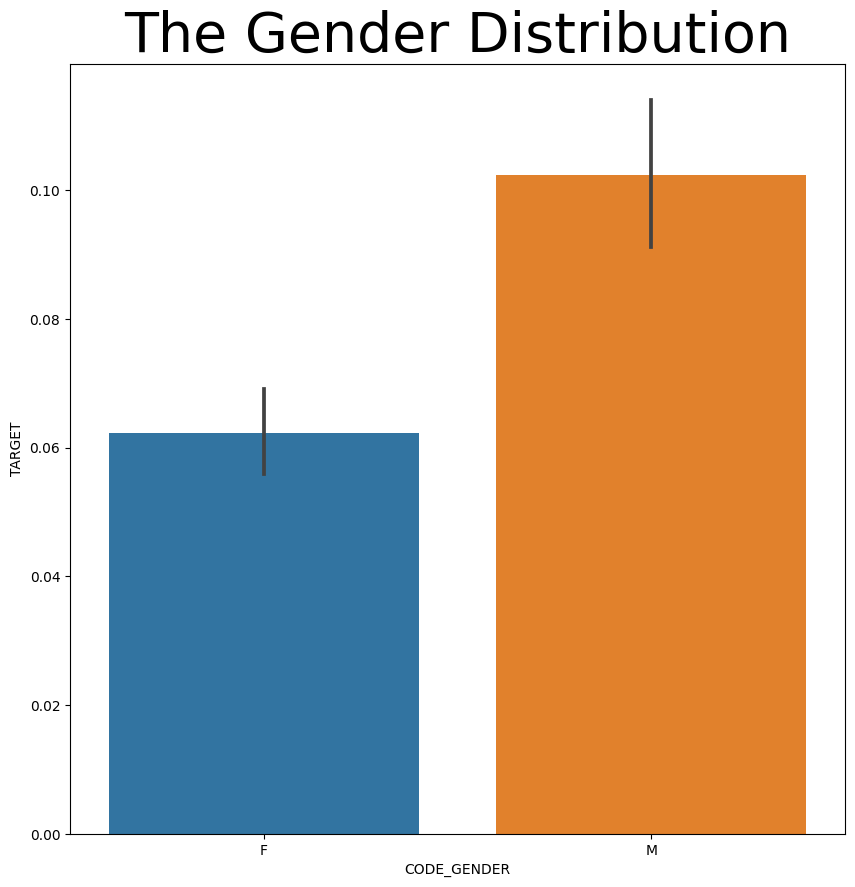

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.barplot(x='CODE_GENDER',y='TARGET', data=app_train)
plt.title('The Gender Distribution', fontsize = 40)
plt.show()

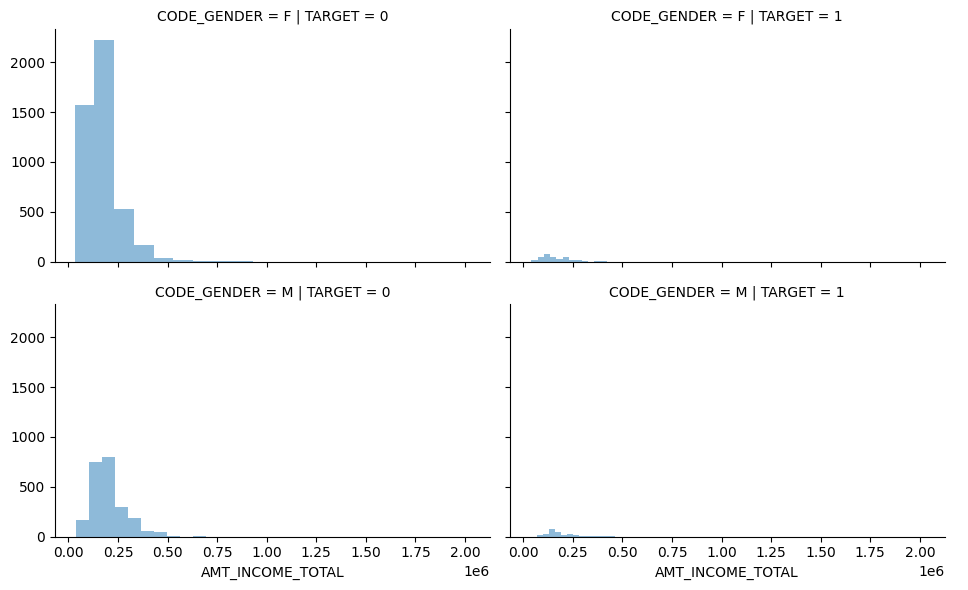

In [ ]:
grid=sns.FacetGrid(app_train,col='TARGET',row='CODE_GENDER', aspect=1.6)
grid.map(plt.hist,'AMT_INCOME_TOTAL',alpha=.5,bins=20)
grid.add_legend()

Based on the visualization of the above data, it can be seen that clients who experience cases of payment difficulties (delayed payment) credit both men and women have an equal and higher distribution of total income compared to clients with other cases of payments, both male and female. This means that most clients who have both male and female incomes have cases of late payments.

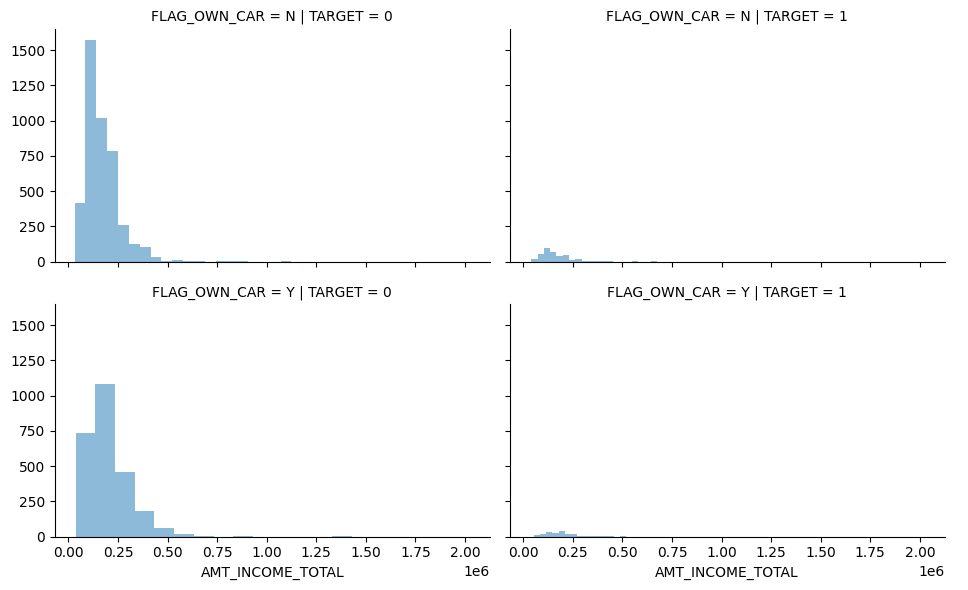

In [ ]:
grid=sns.FacetGrid(app_train,col='TARGET',row='FLAG_OWN_CAR', aspect=1.6)
grid.map(plt.hist,'AMT_INCOME_TOTAL',alpha=.5,bins=20)
grid.add_legend()

Based on the visualization of the above data, it is clear that clients who have payment issues (delayed payment) credit both customers who have a car and customers who do not have a car with a uniform and high distribution of total income when compared to clients who have other payment issues. This means that the majority of clients have income, whether they own a car or not.

## FEATURE ENCODING

In [ ]:
NonNumerical

['CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE',
 'STATUS',
 'NAME_CONTRACT_TYPE_x',
 'WEEKDAY_APPR_PROCESS_START_x',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_TYPE_y',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'ORGANIZATION_TYPE']

In [ ]:
app_train[NonNumerical].nunique()

CREDIT_ACTIVE                    3
CREDIT_CURRENCY                  2
CREDIT_TYPE                     10
STATUS                           4
NAME_CONTRACT_TYPE_x             3
WEEKDAY_APPR_PROCESS_START_x     7
FLAG_LAST_APPL_PER_CONTRACT      1
NAME_CASH_LOAN_PURPOSE          21
NAME_CONTRACT_STATUS             1
NAME_PAYMENT_TYPE                4
CODE_REJECT_REASON               1
NAME_CLIENT_TYPE                 4
NAME_GOODS_CATEGORY             23
NAME_PORTFOLIO                   4
NAME_PRODUCT_TYPE                3
CHANNEL_TYPE                     8
NAME_SELLER_INDUSTRY            10
NAME_YIELD_GROUP                 5
PRODUCT_COMBINATION             16
NAME_CONTRACT_TYPE_y             2
CODE_GENDER                      2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
NAME_INCOME_TYPE                 5
NAME_EDUCATION_TYPE              5
NAME_FAMILY_STATUS               5
NAME_HOUSING_TYPE                6
WEEKDAY_APPR_PROCESS_START_y     7
ORGANIZATION_TYPE   

In [ ]:
app_test[NonNumerical].nunique()

CREDIT_ACTIVE                    3
CREDIT_CURRENCY                  1
CREDIT_TYPE                      9
STATUS                           5
NAME_CONTRACT_TYPE_x             3
WEEKDAY_APPR_PROCESS_START_x     7
FLAG_LAST_APPL_PER_CONTRACT      1
NAME_CASH_LOAN_PURPOSE          18
NAME_CONTRACT_STATUS             1
NAME_PAYMENT_TYPE                4
CODE_REJECT_REASON               1
NAME_CLIENT_TYPE                 4
NAME_GOODS_CATEGORY             22
NAME_PORTFOLIO                   3
NAME_PRODUCT_TYPE                3
CHANNEL_TYPE                     7
NAME_SELLER_INDUSTRY            10
NAME_YIELD_GROUP                 5
PRODUCT_COMBINATION             16
NAME_CONTRACT_TYPE_y             2
CODE_GENDER                      2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
NAME_INCOME_TYPE                 4
NAME_EDUCATION_TYPE              5
NAME_FAMILY_STATUS               5
NAME_HOUSING_TYPE                6
WEEKDAY_APPR_PROCESS_START_y     7
ORGANIZATION_TYPE   

In [ ]:
app_train.drop(['NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [ ]:
app_test.drop(['NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [ ]:
app_train.rename(columns={'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START'},inplace=True)

In [ ]:
app_test.rename(columns={'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START'},inplace=True)

In [ ]:
dropped1 = ['CREDIT_CURRENCY','CREDIT_TYPE','STATUS','NAME_CASH_LOAN_PURPOSE','FLAG_LAST_APPL_PER_CONTRACT','NAME_CONTRACT_STATUS',
            'CODE_REJECT_REASON','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','CHANNEL_TYPE','NAME_INCOME_TYPE','ORGANIZATION_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION']

In [ ]:
app_train.drop(dropped1,axis=1,inplace=True)

In [ ]:
app_test.drop(dropped1,axis=1,inplace=True)

In [ ]:
app_train.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START_x', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PRODUCT_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'TARGET',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_y',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG

In [ ]:
app_test.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START_x', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PRODUCT_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS

In [ ]:
Nonnumerical = app_train.select_dtypes(include=['object']).columns.tolist()
Nonnumerical

['CREDIT_ACTIVE',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [ ]:
app_train[Nonnumerical].nunique()

CREDIT_ACTIVE                 3
NAME_CONTRACT_TYPE            3
WEEKDAY_APPR_PROCESS_START    7
NAME_PAYMENT_TYPE             4
NAME_CLIENT_TYPE              4
NAME_PRODUCT_TYPE             3
NAME_YIELD_GROUP              5
CODE_GENDER                   2
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            5
NAME_HOUSING_TYPE             6
dtype: int64

In [ ]:
app_test[Nonnumerical].nunique()

CREDIT_ACTIVE                 3
NAME_CONTRACT_TYPE            3
WEEKDAY_APPR_PROCESS_START    7
NAME_PAYMENT_TYPE             4
NAME_CLIENT_TYPE              4
NAME_PRODUCT_TYPE             3
NAME_YIELD_GROUP              5
CODE_GENDER                   2
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            5
NAME_HOUSING_TYPE             6
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_1 = LabelEncoder()
# Data Train
app_train['NAME_CONTRACT_TYPE'] = label_1.fit_transform(app_train['NAME_CONTRACT_TYPE'])
app_train['CREDIT_ACTIVE'] = label_1.fit_transform(app_train['CREDIT_ACTIVE'])
app_train['FLAG_OWN_CAR'] = label_1.fit_transform(app_train['FLAG_OWN_CAR'])
app_train['FLAG_OWN_REALTY'] = label_1.fit_transform(app_train['FLAG_OWN_REALTY'])
app_train['NAME_PAYMENT_TYPE'] = label_1.fit_transform(app_train['NAME_PAYMENT_TYPE'])
app_train['NAME_EDUCATION_TYPE'] = label_1.fit_transform(app_train['NAME_EDUCATION_TYPE'])
app_train['NAME_FAMILY_STATUS'] = label_1.fit_transform(app_train['NAME_FAMILY_STATUS'])
app_train['NAME_HOUSING_TYPE'] = label_1.fit_transform(app_train['NAME_HOUSING_TYPE'])
app_train['WEEKDAY_APPR_PROCESS_START'] = label_1.fit_transform(app_train['WEEKDAY_APPR_PROCESS_START'])
app_train['NAME_CLIENT_TYPE'] = label_1.fit_transform(app_train['NAME_CLIENT_TYPE'])
app_train['NAME_PRODUCT_TYPE'] = label_1.fit_transform(app_train['NAME_PRODUCT_TYPE'])
app_train['NAME_YIELD_GROUP'] = label_1.fit_transform(app_train['NAME_YIELD_GROUP'])
app_train['CODE_GENDER'] = label_1.fit_transform(app_train['CODE_GENDER'])

# Data Test
app_test['NAME_CONTRACT_TYPE'] = label_1.fit_transform(app_test['NAME_CONTRACT_TYPE'])
app_test['CREDIT_ACTIVE'] = label_1.fit_transform(app_test['CREDIT_ACTIVE'])
app_test['FLAG_OWN_CAR'] = label_1.fit_transform(app_test['FLAG_OWN_CAR'])
app_test['FLAG_OWN_REALTY'] = label_1.fit_transform(app_test['FLAG_OWN_REALTY'])
app_test['NAME_PAYMENT_TYPE'] = label_1.fit_transform(app_test['NAME_PAYMENT_TYPE'])
app_test['NAME_EDUCATION_TYPE'] = label_1.fit_transform(app_test['NAME_EDUCATION_TYPE'])
app_test['NAME_FAMILY_STATUS'] = label_1.fit_transform(app_test['NAME_FAMILY_STATUS'])
app_test['NAME_HOUSING_TYPE'] = label_1.fit_transform(app_test['NAME_HOUSING_TYPE'])
app_test['WEEKDAY_APPR_PROCESS_START'] = label_1.fit_transform(app_test['WEEKDAY_APPR_PROCESS_START'])
app_test['NAME_CLIENT_TYPE'] = label_1.fit_transform(app_test['NAME_CLIENT_TYPE'])
app_test['NAME_PRODUCT_TYPE'] = label_1.fit_transform(app_test['NAME_PRODUCT_TYPE'])
app_test['NAME_YIELD_GROUP'] = label_1.fit_transform(app_test['NAME_YIELD_GROUP'])
app_test['CODE_GENDER'] = label_1.fit_transform(app_test['CODE_GENDER'])

In [ ]:
app_train.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100054,5727773,0,-1138,0,0,56092.5,0.0,-42,-37,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,100105,5707344,1,-1724,0,0,30600.0,0.0,-1660,-56,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0
2,100131,6372722,0,-875,0,0,274500.0,0.0,-14,-28,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
3,100204,6363484,1,-146,0,0,22500.0,0.0,-19,-4,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
4,100221,5625644,1,-2703,0,0,186750.0,0.0,-1972,-88,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:
app_test.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100057,5004967,1,-1542,0,0,81219.60,0.0,-858,-50,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100067,5828832,1,-1358,0,0,0.00,0.0,-906,-44,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,100090,6369797,0,-208,0,0,61084.80,0.0,-15,-6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
3,100109,5011296,1,-2153,0,0,60246.99,0.0,-1818,-70,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100256,6030627,0,-299,0,0,90004.50,0.0,-23,-9,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


## FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Input X and Y
X=app_train.drop(['TARGET'], axis=1)
Y=app_train['TARGET']

In [ ]:
# VarianceThreshold
variance = VarianceThreshold()
X_var = variance.fit_transform(X)
X_var.shape

(7451, 78)

In [ ]:
importance=mutual_info_classif(X,Y,random_state=0)
feat_importance=pd.Series(importance, X.columns)
feat_importance

SK_ID_CURR                    0.000000
SK_ID_BUREAU                  0.007655
CREDIT_ACTIVE                 0.001569
DAYS_CREDIT                   0.002139
CREDIT_DAY_OVERDUE            0.005303
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK    0.002250
AMT_REQ_CREDIT_BUREAU_MON     0.000681
AMT_REQ_CREDIT_BUREAU_QRT     0.003357
AMT_REQ_CREDIT_BUREAU_YEAR    0.000000
Length: 85, dtype: float64

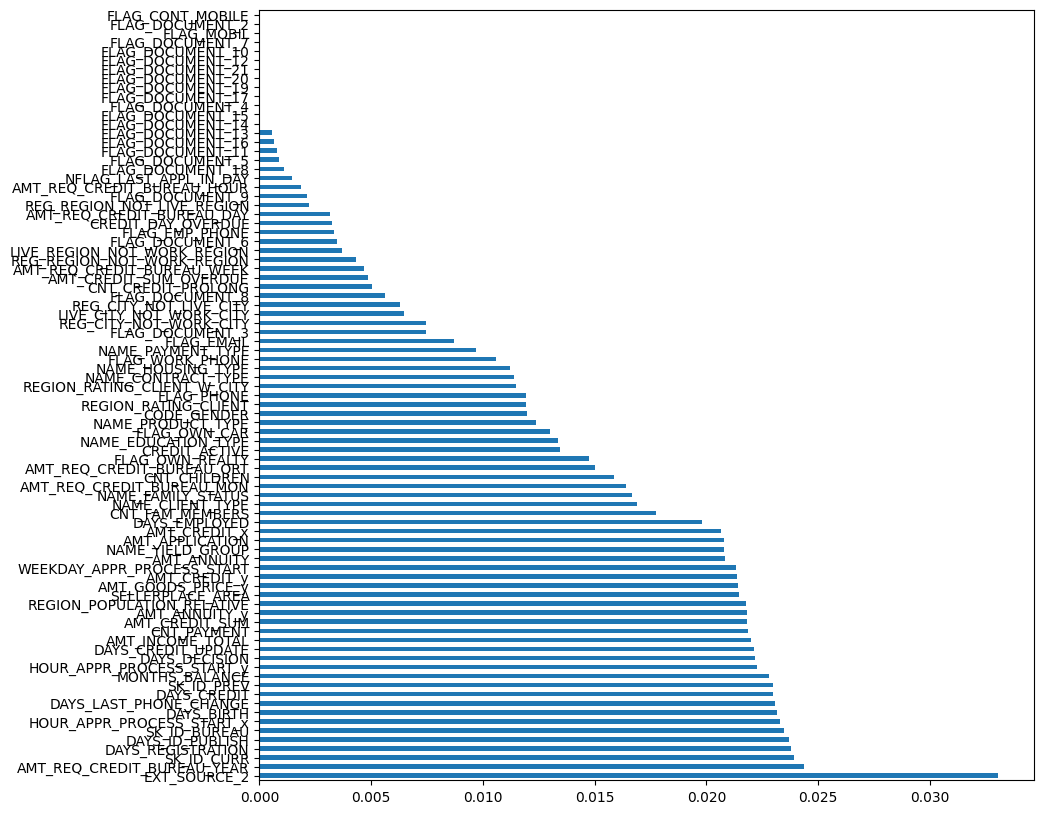

In [ ]:
# ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
model.feature_importances_

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(87).plot(kind='barh')
plt.show()

In [ ]:
X.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START_x', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PRODUCT_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_y', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_y',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
 

In [ ]:
app_test.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START_x', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PRODUCT_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS

In [ ]:
app_train.drop(['AMT_ANNUITY','FLAG_MOBIL','EXT_SOURCE_2'],axis=1,inplace=True)

In [ ]:
app_test.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_MOBIL','EXT_SOURCE_2'],axis=1,inplace=True)

In [ ]:
app_train.shape

(7451, 83)

In [ ]:
app_test.shape

(4469, 82)

## STANDARDIZATION SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Nonnumerical

['CREDIT_ACTIVE',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [ ]:
nonnumerical = ['CREDIT_ACTIVE',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE','SK_ID_CURR','TARGET','SK_ID_PREV','SK_ID_BUREAU']

In [ ]:
numerical = [x for x in app_train.columns if x not in nonnumerical]
numerical

['DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'MONTHS_BALANCE',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'HOUR_APPR_PROCESS_START_x',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_y',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',


In [ ]:
scaler=StandardScaler()
app_train[numerical]=scaler.fit_transform(app_train[numerical].values)
app_train

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100054,5727773,0,-0.130392,-0.017492,-0.090639,-0.340358,-0.017258,0.735984,-0.134413,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,-0.525500,-0.261721
1,100105,5707344,1,-0.863009,-0.017492,-0.090639,-0.365706,-0.017258,-1.761565,-0.857442,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,2.588216,0.761946
2,100131,6372722,0,0.198411,-0.017492,-0.090639,-0.123183,-0.017258,0.779205,0.208075,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,-0.525500,0.761946
3,100204,6363484,1,1.109806,-0.017492,-0.090639,-0.373761,-0.017258,0.771487,1.121375,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,2.588216,-1.285389
4,100221,5625644,1,-2.086955,-0.017492,-0.090639,-0.210438,-0.017258,-2.243169,-2.075175,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,1.031358,0.761946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7446,455738,6363305,1,0.670986,-0.017492,-0.090639,-0.201055,-0.017258,0.223508,0.664725,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,-0.525500,-0.773555
7447,455933,5254210,1,0.989787,-0.017492,-0.090639,1.195033,-0.017258,0.472028,0.969158,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,-0.525500,-1.285389
7448,456057,6258744,0,0.974785,-0.017492,-0.090639,-0.221624,-0.017258,0.745246,0.969158,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,-0.525500,-0.261721
7449,456217,6026762,0,0.287175,-0.017492,-0.090639,0.820062,-0.017258,0.793097,0.284183,...,-0.062508,-0.011586,-0.011586,0.0,-0.082673,-0.06061,-0.139052,-0.345545,2.588216,-0.773555


In [ ]:
app_test[numerical]=scaler.fit_transform(app_test[numerical].values)
app_test

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100057,5004967,1,-0.368804,-0.026173,-0.043222,-0.312765,-0.029897,-0.261003,-0.361131,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,-0.778706
1,100067,5828832,1,-0.135727,-0.026173,-0.043222,-0.408094,-0.029897,-0.329708,-0.129820,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,-0.275810
2,100090,6369797,0,1.321007,-0.026173,-0.043222,-0.336398,-0.029897,0.945638,1.335150,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,1.232875
3,100109,5011296,1,-1.142773,-0.026173,-0.043222,-0.337381,-0.029897,-1.635113,-1.132168,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,0.227085
4,100256,6030627,0,1.205735,-0.026173,-0.043222,-0.302454,-0.029897,0.934187,1.219494,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,0.837032,1.735771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,455908,6817937,1,-1.569660,-0.026173,-0.043222,-0.328868,-0.029897,-0.670373,-1.556238,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,0.837032,-0.778706
4465,456010,6360697,1,-0.642417,-0.026173,-0.043222,-0.371349,-0.029897,-1.360291,-0.630994,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,-1.281601
4466,456114,6020753,0,1.441346,-0.026173,-0.043222,-0.144008,-0.029897,0.938481,1.450805,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,0.837032,-0.275810
4467,456115,6549607,0,0.098617,-0.026173,-0.043222,1.123603,-0.029897,0.955657,0.101491,...,-0.029931,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,0.227085


array([[<Axes: title={'center': 'DAYS_CREDIT'}>,
        <Axes: title={'center': 'CREDIT_DAY_OVERDUE'}>,
        <Axes: title={'center': 'CNT_CREDIT_PROLONG'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM_OVERDUE'}>,
        <Axes: title={'center': 'DAYS_CREDIT_UPDATE'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>,
        <Axes: title={'center': 'AMT_ANNUITY_y'}>],
       [<Axes: title={'center': 'AMT_APPLICATION'}>,
        <Axes: title={'center': 'AMT_CREDIT_x'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START_x'}>,
        <Axes: title={'center': 'NFLAG_LAST_APPL_IN_DAY'}>,
        <Axes: title={'center': 'DAYS_DECISION'}>,
        <Axes: title={'center': 'SELLERPLACE_AREA'}>,
        <Axes: title={'center': 'CNT_PAYMENT'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>],
       [<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT_y'}>,
        <Axes: title={'center': 

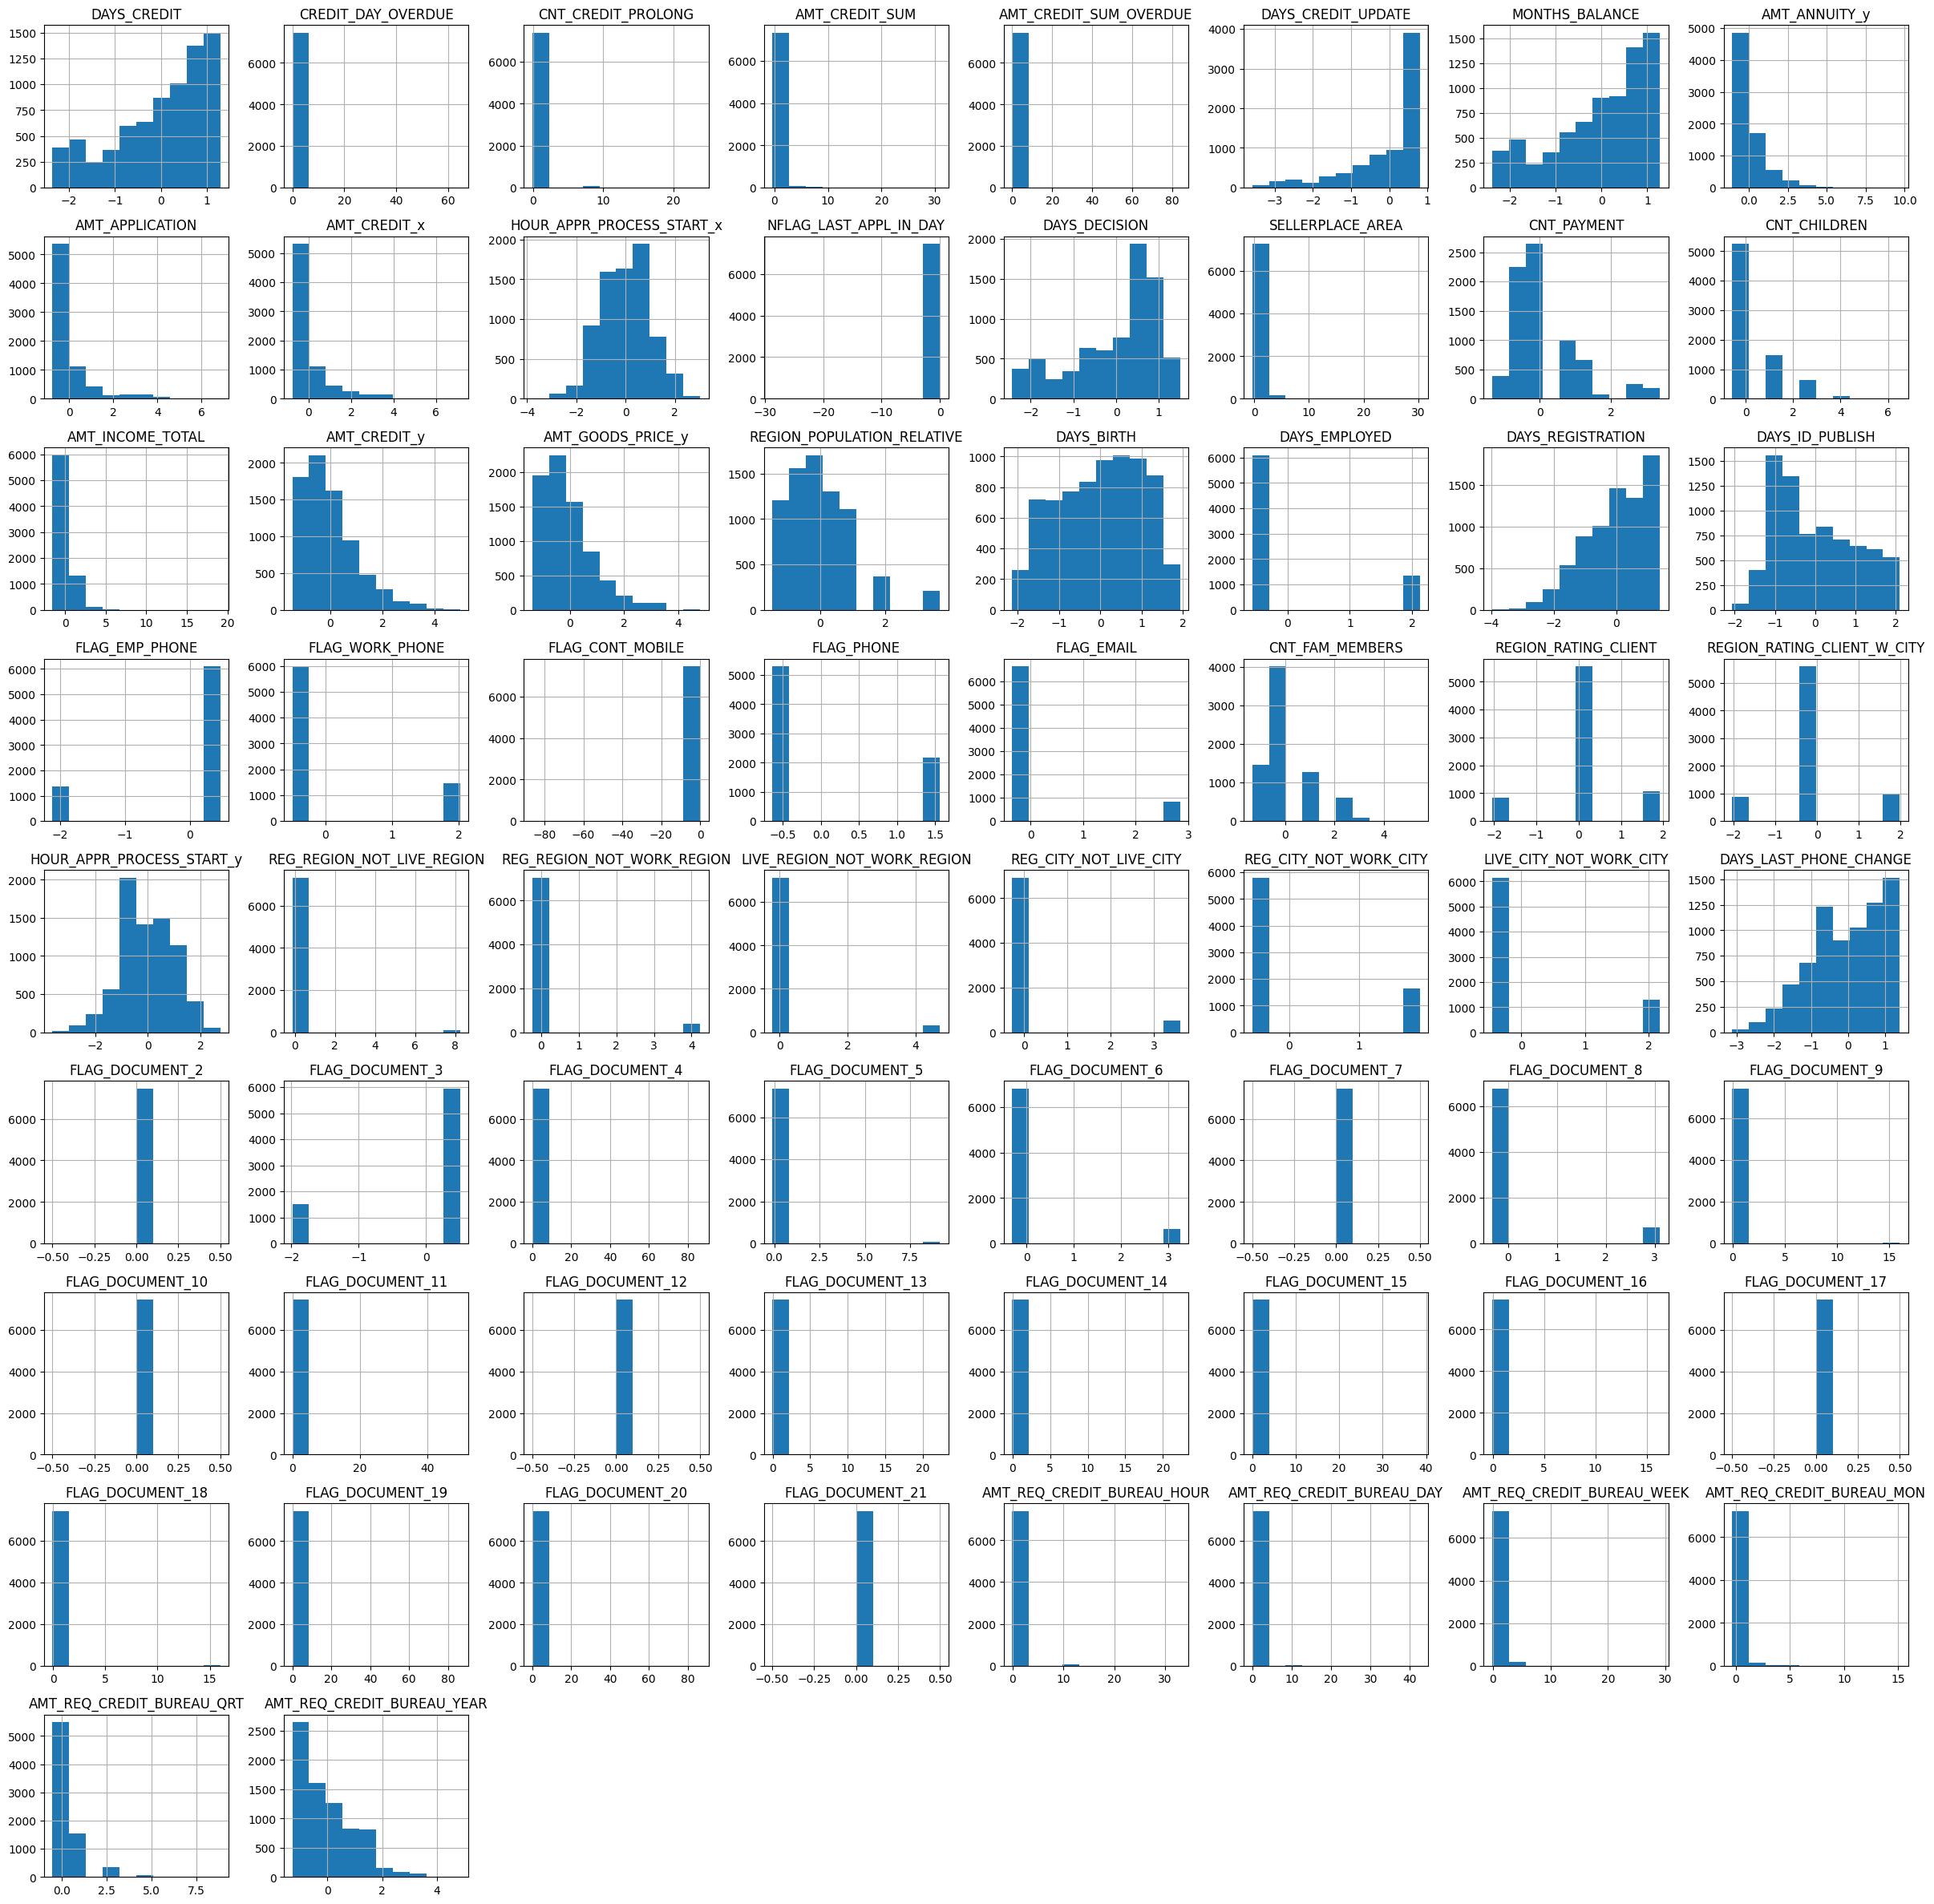

In [ ]:
app_train[numerical].hist(figsize = (30, 30))

## HANDLING IMBALANCED DATA

In [ ]:
app_train['TARGET'].value_counts()

0    6883
1     568
Name: TARGET, dtype: int64

In [ ]:
# Input x and y
x=app_train.drop(['TARGET'], axis=1)
y=app_train['TARGET']

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
rus=RandomUnderSampler()
rus.fit(x,y)
X_resample,Y_resample=rus.fit_resample(x,y)
Counter(Y_resample)

Counter({0: 568, 1: 568})

In [ ]:
ros=RandomOverSampler()
ros.fit(x,y)
X_resample,Y_resample=ros.fit_resample(x,y)
Counter(Y_resample)

Counter({0: 6883, 1: 6883})

In [ ]:
smote=SMOTE(sampling_strategy='minority')
x_smote,y_smote=smote.fit_resample(x,y)
Counter(y_smote)

Counter({0: 6883, 1: 6883})

## MODEL MACHINE LEARNING

The machine learning model used in this project consists of two models: Logistic Regression and Gaussian Naive Bayes. Then choose the best model based on its hyperparameters.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Logistic Regression:'+str(acc_log))
print(classification_report(Y_test, Y_pred))

# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print('Gaussian:'+str(acc_gaussian))
print(classification_report(Y_test, Y_pred))

Logistic Regression:51.08
              precision    recall  f1-score   support

           0       0.51      0.46      0.49      1400
           1       0.50      0.55      0.52      1354

    accuracy                           0.50      2754
   macro avg       0.51      0.51      0.50      2754
weighted avg       0.51      0.50      0.50      2754

Gaussian:53.4
              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1400
           1       0.51      0.70      0.59      1354

    accuracy                           0.52      2754
   macro avg       0.52      0.52      0.50      2754
weighted avg       0.52      0.52      0.50      2754



## HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
# Grid Parameters
tol=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# penalty
penalty=['l1', 'l2']
# Solver
solver=['liblinear', 'lbfgs']
# iter
max_iter=[int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# random_state
random_state = [0,42,123]
# Class Weight
class_weight=['balanced']
# Create the random grid
random_grid = {'tol': tol,
               'penalty': penalty,
               'solver': solver,
               'max_iter': max_iter,
               'random_state': random_state,
               'class_weight': class_weight}
random_grid

{'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear', 'lbfgs'],
 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'random_state': [0, 42, 123],
 'class_weight': ['balanced']}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lg = LogisticRegression()
# Random search of parameters, using 3 fold cross validation,
# search across 10 different combinations, and use all available cores
lg_random = RandomizedSearchCV(estimator = lg, param_distributions = random_grid, n_iter = 10, cv = 3)
# Fit the random search model
lg_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'class_weight': ['balanced'],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [0, 42, 123],
                                        'solver': ['liblinear', 'lbfgs'],
                                        'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                                100]})

In [ ]:
best_random = lg_random.best_estimator_
acc_random_forest = round(best_random.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

80.68


In [ ]:
best_random

LogisticRegression(class_weight='balanced', max_iter=800, penalty='l1',
                   random_state=123, solver='liblinear', tol=1)

## MODEL MACHINE LEARNING LOGISTIC REGRESSION AND GAUSSIAN NAIVE BAYES

In [ ]:
# Model Machine Learning with the best parameters
# Logistic Regression
lg_fix = LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                            random_state=42, solver='liblinear', tol=0.1)
lg_fix.fit(X_train, Y_train)
Y_pred_1 = lg_fix.predict(X_test)
acc_log = round(lg_fix.score(X_train, Y_train) * 100, 2)
print('Logistic Regression:'+str(acc_log))
print(classification_report(Y_test, Y_pred_1))

# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_2 = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print('Gaussian:'+str(acc_gaussian))
print(classification_report(Y_test, Y_pred_2))

Logistic Regression:80.58
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1400
           1       0.80      0.81      0.80      1354

    accuracy                           0.81      2754
   macro avg       0.81      0.81      0.81      2754
weighted avg       0.81      0.81      0.81      2754

Gaussian:53.4
              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1400
           1       0.51      0.70      0.59      1354

    accuracy                           0.52      2754
   macro avg       0.52      0.52      0.50      2754
weighted avg       0.52      0.52      0.50      2754



In [ ]:
# Matrix Confusion
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(Y_test, Y_pred_1)
cm_2 = confusion_matrix(Y_test, Y_pred_2)

Text(0.5, 80.7222222222222, 'Predicted label')

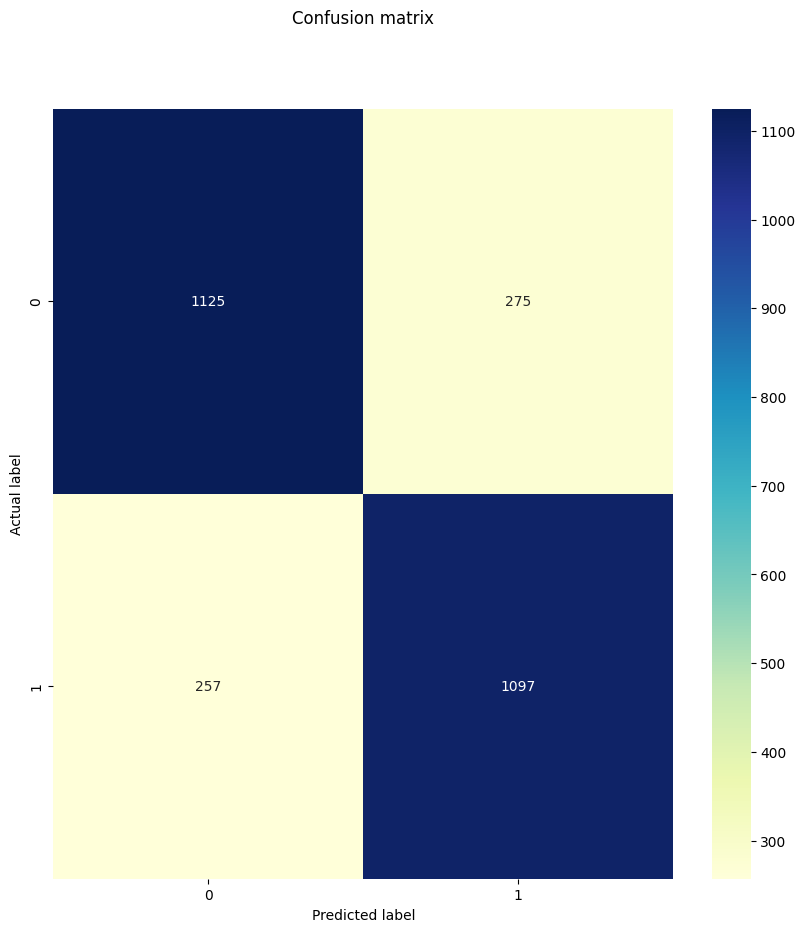

In [ ]:
sns.heatmap(cm_1, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 80.7222222222222, 'Predicted label')

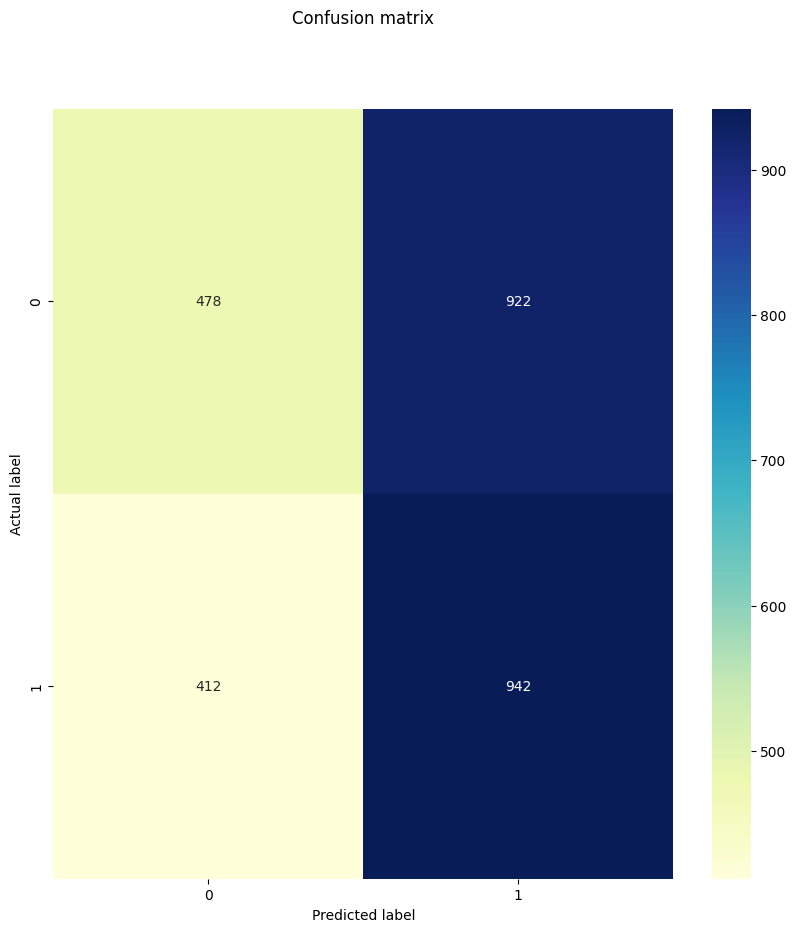

In [ ]:
sns.heatmap(cm_2, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import roc_curve, auc
# Make predictions on the test set
Y_pred_prob = lg_fix.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

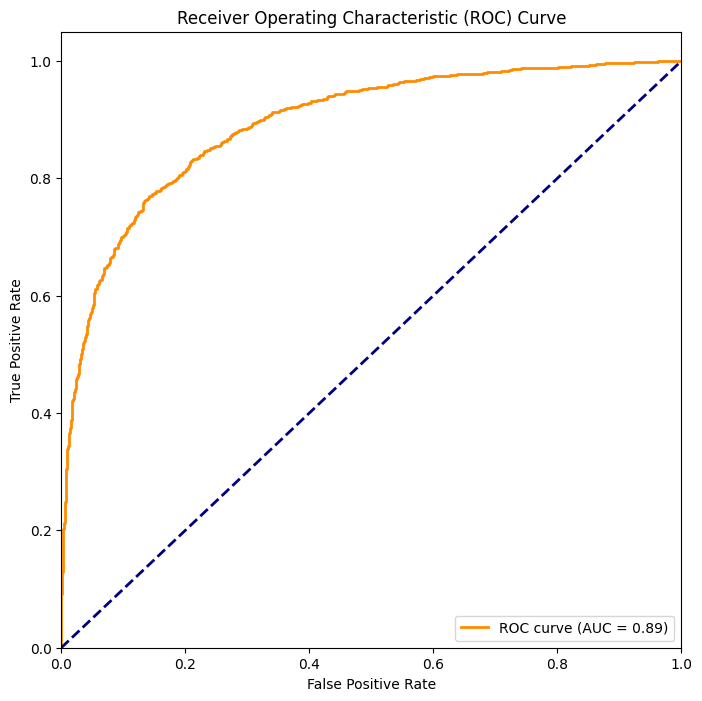

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Based on the analysis of machine learning data above, it was found that Logistic Regression is the best machine learning model with a higher accuracy score compared to Gaussian Naive Bayes.

In [ ]:
import pickle
filename = 'logistic_regression_model.sav'
pickle.dump(lg_fix, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
Y_predict = loaded_model.predict(app_test)

In [ ]:
app_test['TARGET']=Y_predict

In [ ]:
app_test.reset_index()

,index,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,100057,5004967,1,-0.368804,-0.026173,-0.043222,-0.312765,-0.029897,-0.261003,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,-0.778706,0
1,1,100067,5828832,1,-0.135727,-0.026173,-0.043222,-0.408094,-0.029897,-0.329708,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,-0.275810,0
2,2,100090,6369797,0,1.321007,-0.026173,-0.043222,-0.336398,-0.029897,0.945638,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,1.232875,0
3,3,100109,5011296,1,-1.142773,-0.026173,-0.043222,-0.337381,-0.029897,-1.635113,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,0.227085,0
4,4,100256,6030627,0,1.205735,-0.026173,-0.043222,-0.302454,-0.029897,0.934187,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,0.837032,1.735771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,4464,455908,6817937,1,-1.569660,-0.026173,-0.043222,-0.328868,-0.029897,-0.670373,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,0.837032,-0.778706,0
4465,4465,456010,6360697,1,-0.642417,-0.026173,-0.043222,-0.371349,-0.029897,-1.360291,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,-1.281601,0
4466,4466,456114,6020753,0,1.441346,-0.026173,-0.043222,-0.144008,-0.029897,0.938481,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,0.837032,-0.275810,0
4467,4467,456115,6549607,0,0.098617,-0.026173,-0.043222,1.123603,-0.029897,0.955657,...,0.0,0.0,0.0,-0.051888,-0.039608,-0.036666,-0.090437,-0.696669,0.227085,1


In [ ]:
app_test['TARGET'].value_counts()

0    3744
1     725
Name: TARGET, dtype: int64


Based on the target prediction results on the application_test.csv dataset can be obtained that most clients on such datasets have cases of credit payment difficulties (late payment). ![homecredit.png](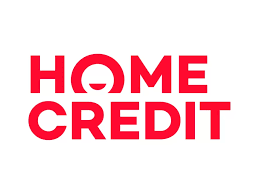![rakamin.png](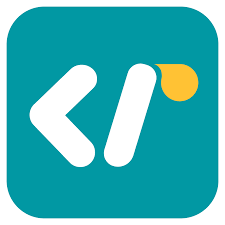![homecredit.png](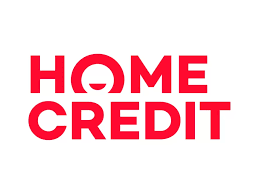![colab.png](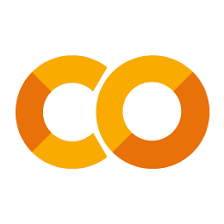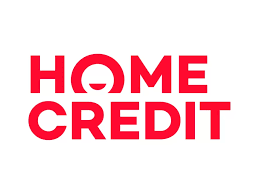))))

## CHECK UNDERFITTING, BESTFITTING, OR OVERFITTING

In [ ]:
x_test=app_test.drop(['TARGET'], axis=1)
y_test=app_test['TARGET']

In [ ]:
smote=SMOTE(sampling_strategy='minority')
x_test,y_test=smote.fit_resample(x_test,y_test)
Counter(y_test)

Counter({0: 3744, 1: 3744})

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [ ]:
# Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                            random_state=42, solver='liblinear', tol=0.1)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accu_log = round(logreg.score(x_train, y_train) * 100, 2)
print('Logistic Regression:'+str(accu_log))
print(classification_report(y_test, y_pred))

Logistic Regression:98.73
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       779
           1       0.97      0.98      0.98       719

    accuracy                           0.98      1498
   macro avg       0.98      0.98      0.98      1498
weighted avg       0.98      0.98      0.98      1498



Based on the accuracy checks related to the prediction of test datasets, it can be concluded that the accuracy of the test dataset is higher than the train dataset. This indicates that the machine learning of logistic regression model is well-fitting.

## BUSINESS RECOMMENDATION

We have two solutions related to the problem of this project, among them:

1. Provide the most appropriate recommendations regarding credit to the client that are tailored to their needs and adjusted based on their personal income. This aims to ensure that the client does not mind paying the credit.

2. If there is a client with a child or family living in an area far from the city center who wishes to apply for a loan but has a low yield, then Home Credit may consider the loan to the client concerned and inform the client politely. It is concerned that the client will have difficulty paying the loan.